# Análisis de patrones de éxito para la industria de los videojuegos

# Contenido

* [Introducción](#a)
* [Objetivos](#b)
* [Etapas](#c)
* [Inicialización](#d)
    * [Cargar los datos](#d1)
    * [Exploración inicial de datos](#d2)
    * [Exploración inicial de los valores ausentes](#d3)
    * [Conclusiones del apartado](#d5)
* [Preprocesamiento de datos](#e)
    * [Corregir nombres de las columnas](#e1)
    * [Corregir datos de name](#e2)
    * [Corregir datos de platform](#e3)
    * [Corregir datos de year_of_release](#e4)
    * [Corregir datos de genre](#e5)
    * [Corregir datos de critic_score](#e6)
    * [Corregir datos de user_score](#e7)
    * [Corregir datos de rating](#e8)
    * [Enriquecer los datos:ventas totales](#e9)
    * [Conclusiones del apartado](#e10)
* [Análisis de datos](#f)
    * [Videojuegos lanzados por año](#f1)
    * [Ventas totales y anuales por plataforma](#f2)
    * [Plataformas potencialmente rentables](#f3)
    * [Ventas globales por plataforma](#f4)
    * [Efectos de las reseñas en las ventas de un caso representativo](#f5)
    * [Videojuegos más exitosos por plataforma](#f6)
    * [Ventas de videojuegos por género](#f7)
    * [Perfil de usuario por región](#f8)
    * [Conclusiones del apartado](#f9)
* [Pruebas de hipótesis](#g)
    * [Primera hipótesis](#g1)
    * [Segunda hipótesis](#g2)
* [Conclusiones](#h)

# Introducción <a id='a'></a>

En esta oportunidad la tienda online dedicada a la venta de videojuegos *Ice* nos tiene por encargo analizar e indentificar patrones que determinen si un juego tiene éxito o no, para luego detectar proyectos prometedores y planificar campañas publicitarias al respecto. Para esto se nos proporciona una base de datos de hasta 2016, incluyendo reseñas de usuarios y expertos, géneros, plataformas, etc. Con el fin de lograr estos objetivos, haremos usos de las diversas técnicas de preprocesamiento, análisis exploratorio y estadístico de los datos, para así abordar de la forma más integral posible el proceso analítico.

Las hipótesis estadísticas específicas serán presentadas en el siguiente apartado.

# Objetivos <a id='b'></a>

Tenemos, en particular, estas hipótesis específicas a probar:

* Existe diferencia entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC.
* Existe diferencia entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.

A estas hipótesis estadísticas complementamos con analítica general sobre las ventas, reseñas de usuarios, comportamiento del usuario, plataformas y regiones, para determinar los patrones y características de videojuegos exitosos.

# Etapas de análisis <a id='c'></a>

Para este proyecto, seguiremos el siguiente esquema básico para mantener el proceso ordenado:
1. Descripción de datos
2. Preprocesamientos de datos
3. Análisis de datos
4. Prueba de hipótesis
5. Conclusiones

Debido a la asimetría de información, para garantizar un adecuado tratamiento y análisis de datos se usarán algunos supuestos razonables, cuya lógica será explicada y no debería deteriorar nuestras conclusiones.

# Inicialización: descripción de datos <a id='d'></a>

**Carga de librerías necesarias**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
# carga todas las librerías necesarias

## Cargar los datos <a id='d1'></a>

In [2]:
try:
    games = pd.read_csv("games.csv")
except:
    games = pd.read_csv("/datasets/games.csv")
# carga del dataset

## Exploración inicial de datos <a id='d2'></a>

En este dataset, la información que se tiene dentro del dataset es la siguiente:

* ``Name``: nombre de videojuego.
* ``Platform``: nombre de la plataforma del juego.
* ``Year_of_Release``: año de lanzamiento (del videojuego).
* ``Genre``: género del videojuego.
* ``NA_sales``: ventas en Norteamérica en millones de dólares estadounidenses.
* ``EU_sales``: ventas en Europa en millones de dólares estadounidenses.
* ``JP_sales``: ventas en Japón en millones de dólares estadounidenses.
* ``Other_sales``: ventas en otros países en millones de dólares estadounidenses.
* ``Critic_Score``: puntaje de la reseña profesional, máximo de 100.
* ``User_Score``: puntaje de la reseña de los usuarios, máximo de 10.
* ``Rating``: clasificación ESRB.

Con esto en mente, obtendremos la información inicial del DataFrame:

In [3]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
games.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Como primera observación, todas las columnas tienen nombres que incluyen mayúsculas, detalle que no es recomendable. Ahora detallaremos los hallazgos por columnas:

* ``Name`` presenta sus valores con mayúsculas y minúsculas, además de tener dos valores ausentes.
* ``Platform`` también presenta valores con mayúsculas y minúsculas.
* ``Year_of_Release`` está registrado como tipo flotante (incorrectamente) y tiene algunos valores ausentes.
* ``Genre`` tiene valores en mayúsculas y dos valores ausentes.
* ``NA_sales``, ``EU_sales``, ``JP_sales`` y ``Other_sales`` no parecen tener problemas explícitos.
* ``Critic_Score`` presenta un gran porcentaje de valores ausentes.
* ``User_Score`` tiene valores ausentes, aunque en menor proporción que la columna anterior y está registrado como tipo objeto, lo cual resulta extraño teniendo en cuenta que es una variable numérica. De hecho, no se mostró su distribución al usar el método "describe" de pandas. 
* ``Rating`` también presenta una relativa gran cantidad de valores ausentes, así como sus valores en mayúsculas.

Dados estos resultados, daremos un repaso a los valores únicos de las columnas categóricas como paso a continuación:

In [6]:
games_categ = games[['Name', 'Platform', 'Genre', 'Rating']]
for column in games_categ:
    try:
        print(f"Valores únicos de la columna '{column}':") # muestra el nombre
        print(games_categ[column].unique()) # valores únicos de cada columna
        print(f"Total: {len(games_categ[column].unique())}")
        print()
    except:
        print("Error al mostrar valores únicos de games_categ")

Valores únicos de la columna 'Name':
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Total: 11560

Valores únicos de la columna 'Platform':
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Total: 31

Valores únicos de la columna 'Genre':
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Total: 13

Valores únicos de la columna 'Rating':
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
Total: 9



Tal como ya habíamos notado, todas las columnas presentan valores con uso de mayúsculas, así como algunas con valores ausentes. Fuera de esto, destacamos lo siguiente:
* Tenemos 11560 juegos distintos, en teoría, ya que se tiene en cuenta a los valores ausentes.
* Tenemos 31 plataformas de juego en los registros históricos.
* Tenemos 12 tipos o géneros de juegos; incluyendo los ausentes son 13 valores únicos.
* La clasificación se resume en 8 tipos; teniendo 9 valores únicos al considerar los ausentes.

Debido a nuestro proceso de análisis, debemos describir la clasificación ESRB y entender qué significa cada categoría o nomenclatura dada, la cual es la siguiente:

*  ``RP``: (Rating Pending) indica que el respectivo juego aún no tiene una calificación asignada por ESRB.
* ``E``: (Everyone) indica contenido apto para todas las edades.
* ``K-A``: (Kids to Adults) indica contenido apto para todas las edades, utilizado hasta 1998 y reemplazado por ``E``.
* ``E10+``: (Everyone 10+) indica contenido apto para mayores de 10 años.
* ``T``: (Teen) indica contenido apto para mayores de 13 años.
* ``M``: (Mature) indica contenido apto para edades de 17 a más.
* ``AO``: (Adults Only) indica contenido solo indicado a mayores de 18 años.
* ``EC``: (Early Childhood) indicaba contenido para audiencia preescolar, retirado en 2018.

Para analizar la distribución de estas columnas, haremos llamado del método "value_counts":

In [7]:
for column in games_categ:
    try:
        print(f"Distribución de valores de la columna '{column}':")
        print(games_categ[column].value_counts(dropna=False, normalize=True))
        print()
    except:
        print("Error al mostrar la distribución de columnas categóricas")

Distribución de valores de la columna 'Name':
Need for Speed: Most Wanted                         0.000718
Madden NFL 07                                       0.000538
FIFA 14                                             0.000538
Ratatouille                                         0.000538
LEGO Marvel Super Heroes                            0.000538
                                                      ...   
Jewels of the Tropical Lost Island                  0.000060
Sherlock Holmes and the Mystery of Osborne House    0.000060
The King of Fighters '95 (CD)                       0.000060
Megamind: Mega Team Unite                           0.000060
Haitaka no Psychedelica                             0.000060
Name: Name, Length: 11560, dtype: float64

Distribución de valores de la columna 'Platform':
PS2     0.129285
DS      0.128687
PS3     0.079629
Wii     0.078971
X360    0.075501
PSP     0.072330
PS      0.071612
PC      0.058271
XB      0.049297
GBA     0.049177
GC      0.033264
3DS

De las distribuciones destacamos la gran relevancia para juegos en plataformas de PS2 y Nintendo DS, ambas con más del 12 % de cuota cada una, relativamente alta respecto a las demás plataformas. En ``Genre``, el género más frecuente es el de "action". Para el caso de ``Rating``, los valores ausentes representan más del 40 % de los valores de la columna. Este caso merece especial atención en el preprocesamiento de datos. No parecen existir más problemas por ahora en nuestro DataFrame.

Dado que el análisis de variables numéricas y categóricas está realizado, ahora exploraremos un poco más de los valores ausentes.

## Exploración de los valores ausentes <a id='d3'></a>

Lo primero será realizar un conteo de los valores ausentes por columnas en términos porcentuales y determinar el porcentaje de valores ausentes para cada columna:

In [8]:
(games.isna().sum()/len(games))*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

Las columnas ``Name`` y ``Genre`` tienen el mismo porcentaje de valores ausentes debido a que, como recordamos, tienen dos valores ausentes cada una. ``Year_of_Release`` presenta un 1.6 % de valores ausentes. Los casos más críticos que requieren tratamiento son ``Critic_Score`` (51.3 %), ``User_Score`` (40.01 %) y ``Rating`` (40.48 %), porque parte de nuestro análisis requerirá tomar en cuenta las reseñas y clasificación. 

Para analizar si los valores ausentes de algunas de estas últimas cuatro columnas tienen relación con alguna otra columna de nuestro DataFrame, mostraremos las distribuciones del dataset completo y las distribuciones sin valores ausentes de cada columna, de la manera siguiente:

In [9]:
for column in games:
    print(games[column].value_counts(dropna=False, normalize=True))
    print()

Need for Speed: Most Wanted                         0.000718
Madden NFL 07                                       0.000538
FIFA 14                                             0.000538
Ratatouille                                         0.000538
LEGO Marvel Super Heroes                            0.000538
                                                      ...   
Jewels of the Tropical Lost Island                  0.000060
Sherlock Holmes and the Mystery of Osborne House    0.000060
The King of Fighters '95 (CD)                       0.000060
Megamind: Mega Team Unite                           0.000060
Haitaka no Psychedelica                             0.000060
Name: Name, Length: 11560, dtype: float64

PS2     0.129285
DS      0.128687
PS3     0.079629
Wii     0.078971
X360    0.075501
PSP     0.072330
PS      0.071612
PC      0.058271
XB      0.049297
GBA     0.049177
GC      0.033264
3DS     0.031110
PSV     0.025725
PS4     0.023452
N64     0.019085
XOne    0.014777
SNES    0.0142

Ahora analizaremos (sin) los valores ausentes de ``Year_of_Release``:

In [10]:
for column in games.dropna(subset='Year_of_Release'):
    print(games.dropna(subset='Year_of_Release')[column].value_counts(dropna=False, normalize=True))
    print()

Need for Speed: Most Wanted               0.000730
Ratatouille                               0.000547
FIFA 14                                   0.000547
LEGO Marvel Super Heroes                  0.000547
FIFA 15                                   0.000486
                                            ...   
Let's Make a Soccer Team!                 0.000061
Loving Life with Hello Kitty & Friends    0.000061
Scrabble (Others sales)                   0.000061
Viva Pinata: Party Animals                0.000061
Haitaka no Psychedelica                   0.000061
Name: Name, Length: 11427, dtype: float64

PS2     0.129332
DS      0.128968
PS3     0.079411
Wii     0.078195
X360    0.074912
PSP     0.072540
PS      0.072358
PC      0.058190
GBA     0.049313
XB      0.048826
GC      0.032956
3DS     0.031132
PSV     0.026085
PS4     0.023836
N64     0.019214
XOne    0.015019
SNES    0.014532
SAT     0.010519
WiiU    0.008938
2600    0.007053
NES     0.005959
GB      0.005898
DC      0.003162
GEN  

Después de una revisión, no se notaron cambios significativos en las distribuciones de las columnas al eliminar los ausentes de ``Year_of_Release``. Ahora continuamos con ``Critic_Score`` (sin sus valores ausentes):

In [11]:
for column in games.dropna(subset='Critic_Score'):
    print(games.dropna(subset='Critic_Score')[column].value_counts(dropna=False, normalize=True))
    print()

Madden NFL 07                                0.001106
LEGO Star Wars II: The Original Trilogy      0.000983
Madden NFL 08                                0.000983
Need for Speed: Most Wanted                  0.000983
Cars                                         0.000983
                                               ...   
Dr. Mario / Puzzle League                    0.000123
DECA Sports Freedom                          0.000123
The Witcher: Enhanced Edition                0.000123
Mystery Case Files: The Malgrave Incident    0.000123
15 Days                                      0.000123
Name: Name, Length: 5085, dtype: float64

PS2     0.159518
X360    0.112572
PS3     0.100774
XB      0.089099
DS      0.088116
PC      0.087870
Wii     0.071894
PSP     0.056778
GC      0.055057
GBA     0.053828
PS4     0.030970
PS      0.024579
XOne    0.020769
3DS     0.020646
PSV     0.014747
WiiU    0.011061
DC      0.001721
Name: Platform, dtype: float64

2008.0    0.087870
2007.0    0.085044
2005.

Los cambios más notables están en la columna referida al nombre del videojuego, donde el orden de importancia cambia un poco y en las plataformas, donde también el orden cambia un poco. Pero estos cambios eran de esperarse dada la magnitud de los valores ausentes de esta columna y a la vez no son cambios muy grandes. Es decir, no se puede considerar a estos cambios un patrón de por sí. Ahora continuamos con ``User_Score``.

In [12]:
for column in games.dropna(subset='User_Score'):
    print(games.dropna(subset='User_Score')[column].value_counts(dropna=False, normalize=True))
    print()

Madden NFL 07                   0.000899
Need for Speed: Most Wanted     0.000899
LEGO Marvel Super Heroes        0.000799
FIFA Soccer 13                  0.000799
Ratatouille                     0.000799
                                  ...   
Virtua Fighter 5 Online         0.000100
Deer Hunter                     0.000100
Wappy Dog                       0.000100
Summer Heat Beach Volleyball    0.000100
15 Days                         0.000100
Name: Name, Length: 6119, dtype: float64

PS2     0.147893
DS      0.127022
X360    0.104853
Wii     0.099860
PS3     0.096265
PC      0.081786
XB      0.073497
PSP     0.054324
GBA     0.051628
GC      0.046834
PS4     0.026263
3DS     0.022968
PS      0.020671
XOne    0.019273
PSV     0.014979
WiiU    0.010485
DC      0.001398
Name: Platform, dtype: float64

2009.0    0.101758
2008.0    0.098562
2007.0    0.081985
2010.0    0.079688
2011.0    0.071700
2005.0    0.070302
2006.0    0.067505
2002.0    0.065508
2003.0    0.061015
2004.0    0.059

De igual forma que con la anterior columna, los cambios registrados en algunas columnas no compensan la proporción de valores ausentes eliminados en esta columna. Por eso no se considera un patrón como tal. 

Finalizamos con los valores ausentes de ``Rating``.

In [13]:
for column in games.dropna(subset='Rating'):
    print(games.dropna(subset='Rating')[column].value_counts(dropna=False, normalize=True))
    print()

Need for Speed: Most Wanted         0.000905
Madden NFL 07                       0.000905
Madden NFL 08                       0.000804
FIFA 14                             0.000804
LEGO Jurassic World                 0.000804
                                      ...   
Silent Hill 2: Restless Dreams      0.000101
NES Remix                           0.000101
Bass Strike                         0.000101
Medieval Moves: Deadmund's Quest    0.000101
Plushees                            0.000101
Name: Name, Length: 6066, dtype: float64

PS2     0.148859
DS      0.127953
X360    0.105739
Wii     0.100714
PS3     0.095688
PC      0.077797
XB      0.073676
PSP     0.054679
GBA     0.052468
GC      0.047140
PS4     0.025631
3DS     0.022917
PS      0.020907
XOne    0.018695
PSV     0.015177
WiiU    0.010554
DC      0.001407
Name: Platform, dtype: float64

2009.0    0.101618
2008.0    0.098603
2007.0    0.082521
2010.0    0.080310
2005.0    0.070962
2011.0    0.070660
2006.0    0.068148
2002.0   

El mismo fenómeno ocurre con los valores ausentes en esta columna, que finalmente no termina por mostrar un patrón real. Por tanto, concluimos que no existe una relación entre los valores ausentes de nuestro DataFrame con alguna de sus columnas.

## Conclusiones del apartado <a id='d4'></a>

Luego de realizado el primer proceso exploratorio inicial del dataset, podemos resumir los hallazgos en los siguientes puntos:

* Nuestro dataset tiene títulos y muchos valores de sus columnas con uso de mayúsculas y minúsculas.
* Algunas columnas (como ``Year_of_Release``) tienen tipos de datos incorrectos que necesitan correciones.
* Cuatro columnas de nuestro dataset cuentan con problemas severos de valores ausentes: ``Year_of_Release``, ``Critic_Score``, ``User_Score`` y ``Rating``, mientras que en otras dos el problema se puede considerar leve.
* Los valores ausentes de las columnas mencionadas no parecen mostrar un patrón o relación con los valores de las demás columnas. 

Dados estos resultados, a continuación pasaremos a la solución de estos problemas: preprocesamiento de datos.

# Preprocesamiento de datos <a id='e'></a>

El primer paso antes de entrar a los valores de las columnas es solucionar el problema con los nombres de las columnas en sí:

## Corregir nombres de las columnas <a id='e1'></a>

Usaremos el formato "string.lower" para solucionar este problema:

In [14]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Corregir datos de ``name`` <a id='e2'></a>

En esta columna detectamos dos valores ausentes, los cuales esta vez analizaremos a profundidad filtrándolos.

In [15]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Notamos que buena parte de sus valores son también nulos. Analizando un poco, no tenemos manera de tratar estos datos por la pobre cantidad de información que se tiene. Dado el poco impacto que tendría, decidimos prescindir de estas filas:

In [16]:
games = games.drop([659, 14244]).reset_index(drop=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Por si no recordábamos, en la columna ``genre`` también teníamos solo dos valores ausentes, los cuales eran exactamente los filtrados y eliminados al tratar los de esta columna, ``name``. Ahora nuestro dataset tiene dos filas menos.

Otro problema con esta columna eran los valores, estando también en formato de mayúsculas en muchos casos. De manera análoga a los nombres de las columnas, se tratará este problema.

In [17]:
games['name'] = games['name'].str.lower()
games['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

## Corregir datos de ``platform`` <a id='e3'></a>

En esta columna el único problema eran sus valores, que usaban formato en mayúsculas y que ahora corregiremos:

In [18]:
games['platform'] = games['platform'].str.lower()
games['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

## Corregir datos de la columna ``year_of_release`` <a id='e4'></a>

Antes de intentar corregir el formato del tipo de datos en esta columna, intentaremos rellenar los valores ausentes que esta columna posee. Para esto usaremos como aproximador a la columna ``platform``: los juegos se agrupan por año de lanzamiento para cada plataforma, o dicho de otra forma, si tenemos en cuenta que las plataformas son lanzadas cada cierto intervalo (relativamente) corto de tiempo, los juegos lanzados (y sus años) dependerán del tipo de plataforma para el que estén diseñados y hayan sido lanzados. Agrupar nuestros datos en base a la plataforma nos dará una buena aproximación para aplicar a nuestros valores ausentes.

Primero crearemos un dataset sin los valores ausentes de esta columna:

In [19]:
games_year_no_na = games.dropna(subset='year_of_release')

Usaremos esta tabla para obtener la moda del año por plataforma, por la naturaleza de la columna ``year_of_release``. (Al usar medias o medianas se tenían algunos valores con decimales, lo cual no sería correcto)

In [20]:
year_platform = games_year_no_na.groupby('platform')['year_of_release'].apply(lambda x: x.mode()[0])
year_platform

platform
2600    1981.0
3do     1995.0
3ds     2011.0
dc      2000.0
ds      2008.0
gb      2000.0
gba     2002.0
gc      2002.0
gen     1994.0
gg      1992.0
n64     1999.0
nes     1986.0
ng      1994.0
pc      2011.0
pcfx    1996.0
ps      1998.0
ps2     2002.0
ps3     2011.0
ps4     2016.0
psp     2006.0
psv     2015.0
sat     1995.0
scd     1994.0
snes    1995.0
tg16    1995.0
wii     2009.0
wiiu    2013.0
ws      1999.0
x360    2011.0
xb      2003.0
xone    2016.0
Name: year_of_release, dtype: float64

Para usar esta tabla en el llenado de valores ausentes, crearemos una función para este objetivo. La función tiene la siguiente forma:

In [21]:
def fillna_year(data):
    year = data['year_of_release']
    platform = data['platform']
    
    if pd.isna(year):
        try:
            return year_platform.loc[platform]
        except:
            return np.nan
    return year

Para probar su correcto funcionamiento, usaremos algunas filas con ausentes del dataset original:

In [22]:
fillna_year(games.iloc[183])

2002.0

In [23]:
fillna_year(games.iloc[456])

2009.0

Dado que funciona correctamente, podemos aplicar nuestra función a la columna y rellenar sus valores ausentes:

In [24]:
games['year_of_release'] = games.apply(fillna_year, axis=1)

Comprobamos si quedaron aún valores ausentes:

In [25]:
games['year_of_release'].isna().sum()

0

Ahora, debido a que en esencia se trata de una columna con fechas, se decide transformar la columna a enteros:

In [26]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16708    2016
16709    2006
16710    2016
16711    2003
16712    2016
Name: year_of_release, Length: 16713, dtype: int32

Esta columna no tiene más problemas por ahora. Continuamos con ``genre``.

## Corregir datos de ``genre`` <a id='e5'></a>

En esta columna teníamos dos valores ausentes que fueron removidos junto a los ausentes de ``name``. Ahora, su otro problema es el uso de mayúsculas en su clasificación, tema del cual nos haremos cargo.

In [27]:
games['genre'] = games['genre'].str.lower()
games['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

## Corregir datos de ``critic_score`` <a id='e6'></a>

Esta columna es la que más porcentaje de valores ausentes acapara (51 %), y a la vez de las más difíciles de tratar. Por definición, la crítica especializada que da un puntaje debió tener acceso al videojuego, jugarlo, emitir su opinión, promediar esta opinión con la de otros expertos y finalmente publicar estos resultados, teniendo en cuenta que la crítica también necesita un sistema de calificación que pudo o no estar acorde a lo que se presenta en nuestra columna. Nuestro dataset se remonta a los años 80's, donde muchas plataformas no habían sido lanzadas, el acceso a las recientes de su época pudo haber sido limitado, y la publicación no tenía medios de respaldo porque no había un acceso a internet generalizado sino hasta los años 2000. Esos factores pudieron ser la causa principal de los valores ausentes presentes en esta columna. Se podría concluir entonces que la mayor parte de los valores ausentes se deben a falta de datos e información, así como posibles errores de recopilación y verificación de los datos. La última hipótesis viene relacionada al acceso de algunos videojuegos que solo fueron diseñados y/o ofertados en ciertos mercados o regiones, lo cual podría ser un motivo más para este problema.

Por tanto, debido a la propia naturaleza de los errores (falta de información en su mayor parte), estos valores no tienen una columna en base a la cual tratar o imputar los datos, haciendo complicado su procesamiento. También tengamos en cuenta que, aunque sea posible buscar esta información y aproximarla usando diversas fuentes, requiere un trabajo minucioso y detallado, que escapa a las posibilidades de desarrollo del proyecto. Por último, las categorías de crítica en general son subjetivas y en algunas situaciones favorecidas para casos (plataformas o videojuegos) concretos. 

Eliminar estos valores ausentes no es una opción debido a la escala del problema. Así que decidiremos mantener estos valores ausentes y maximizar el uso de información en las columnas restantes. Por ahora continuamos con la siguiente columna.

## Corregir datos de la columna ``user_score`` <a id='e7'></a>

En un apartado previo habíamos advertido del tipo de datos que presentaba esta columna a pesar de ser teóricamente uno numérico: *object*. Intentaremos obtener información acerca de posibles errores en esta columna:

In [28]:
games['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

Podemos observar que el problema se debe a que existe un valor "tbd" (*to be determined*, "por determinar" en inglés). En este caso, estas siglas significan en términos prácticos que no existe una calificación consensuada por los usuarios. Lo más adecuado sería transformar nuestra variable a numérica y volver a esta cadena un valor ausente, para lo cual usaremos el método "to_numeric" y su parámetro *errors='coerce'* para realizar ambos procesos al mismo tiempo:

In [29]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16708    NaN
16709    NaN
16710    NaN
16711    NaN
16712    NaN
Name: user_score, Length: 16713, dtype: float64

Ahora, dado que el problema de esta columna con sus valores ausentes es análogo al de ``critic_score``, no encontramos una manera fácil de tratar y rellenar sus valores ausentes ni podemos eliminarlos por su gran proporción. Un enfoque podría ser usar las siglas "tbd" para rellenar los valores ausentes, pero mezclar cadenas con un valor numérico puede que no ayude en el análisis posterior. Debido a eso, mantendremos sus ausentes y continuaremos con la última columna.

## Corregir datos de ``rating`` <a id='e8'></a>

El problema de valores ausentes persiste también en esta columna, y también sus posibles razones son bastante parecidas. El problema en particular se remonta a que la entidad clasificadora (ESRB) fue realmente establecida recién en 1994 y solo realizó menciones para algunos videojuegos previos a su creación. Un caso también relacionado a este problema es la clasificación "K-A" (*Kids to Adults*), que fue reemplazada por "E" (*Everyone*) luego de su uso. También recordemos que la clasificación "EC" (*Early Childhood*) fue dejada de usar alrededor del 2018 porque ESRB consideró que solo fue usado en muy pocos casos y los títulos con esta clasificación se adaptaban mejor y fueron reemplazados por "E" (*Everyone*). Estos dos casos, por ejemplo, serán reemplazados antes de decidir qué hacer con los valores ausentes, de la siguiente manera:

In [30]:
games['rating'].value_counts(dropna=False)

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [31]:
games['rating'] = games['rating'].replace({'K-A': 'E', 'EC': 'E'})
games['rating'].value_counts(dropna=False)

NaN     6764
E       4001
T       2961
M       1563
E10+    1420
RP         3
AO         1
Name: rating, dtype: int64

Tal como observamos, hemos logrado reducir el número de clasificaciones acorde a las que están en uso. Recordemos que tenemos una categoría para clasificar a los juegos que aún no han obtenido una clasificación: "RP" (*Rating Pending*). Contrario al caso anterior, donde nuestra columna era numérica, en este caso podemos usar esta clasificación para los valores ausentes, debido a que la columna ``rating`` es categórica y de cierto modo el origen de los valores ausentes es parecido al de casos anteriores: falta de información. 

In [32]:
games['rating'] = games['rating'].fillna('RP')
games['rating'].value_counts()

RP      6767
E       4001
T       2961
M       1563
E10+    1420
AO         1
Name: rating, dtype: int64

In [33]:
games['rating'].isna().sum()

0

Ahora volveremos minúsculas a la clasificación por temas de buenas prácticas:

In [34]:
games['rating'] = games['rating'].str.lower()
games['rating'].value_counts()

rp      6767
e       4001
t       2961
m       1563
e10+    1420
ao         1
Name: rating, dtype: int64

Ahora que no tenemos valores ausentes, es quizá recomendable guardar las equivalencias de las siglas usadas en una columna extra y así tener la referencia de su equivalencia de forma más explícita. La columna que integrará esta información se llamará ``rating_esrb``.

In [35]:
rating_conditions = {'rp': 'rating pending', 'e': 'everyone', 't': 'teen', 'm': 'mature', 'e10+': 'everyone 10+', 'ao': 'adults only'}

In [36]:
games['rating_esrb'] = games['rating'].replace(rating_conditions)
games['rating_esrb'].value_counts()

rating pending    6767
everyone          4001
teen              2961
mature            1563
everyone 10+      1420
adults only          1
Name: rating_esrb, dtype: int64

In [37]:
rating_dict = games[['rating', 'rating_esrb']].drop_duplicates().reset_index(drop=True)
rating_dict

,rating,rating_esrb
0,e,everyone
1,rp,rating pending
2,m,mature
3,t,teen
4,e10+,everyone 10+
5,ao,adults only


El diccionario de equivalencias está hecho. Pasaremos a la siguiente sección.

## Enriquecer los datos: ventas totales <a id='e9'></a>

En algún momento de nuestro análisis requeriremos usar las ventas totales para, por ejemplo, visualizar la tendencia de estas a lo largo del tiempo por plataformas o género, dependiendo del caso. Ya que parte de nuestro análisis se enfoca en el éxito de un videojuego, las ventas totales también pueden ser una buena aproximación al éxito logrado. Por estas razones se creará una columna nueva con la sumatoria de las ventas por regiones:

In [38]:
games['total_sales'] = (
    games['na_sales'] +
    games['eu_sales'] +
    games['jp_sales'] +
    games['other_sales']
)

In [39]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_esrb,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,everyone,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,rp,rating pending,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,everyone,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,everyone,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,rp,rating pending,31.38


Como siguiente paso, realizaremos un conteo de posibles duplicados explícitos:

In [40]:
games.duplicated().sum()

0

Ya que no se presentan duplicados explícitos, ahora una última revisión de nuestro DataFrame para dar las conclusiones respectivas:

In [41]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  rating_esrb      16713 non-null  object 
 12  total_sales      16713 non-null  float64
dtypes: float64(7), int32(1), object(5)
memory usage: 1.6+ MB


## Conclusiones del apartado <a id='e10'></a>

Luego de un exhaustivo proprocesamiento de datos, tenemos lo siguiente a concluir:

* Los nombres de nuestras columnas fueron "estandarizados" hacia minúsculas.
* En la columna ``name`` se decidió eliminar sus dos filas con valores ausentes, por su poca relevancia. De hecho, estas filas con ausentes estaban relacionadas con los ausentes de ``genre``.
* En todas las columnas categóricas sus respectivos valores fueron llevados a minúsculas.
* Se logró solucionar los valores ausentes de ``year_of_release``, rellenando sus ausentes con el año más frecuente por plataforma. En el caso de ``rating``, de decidió usar la categoría "rp" para incluir a los valores ausentes. Luego se generó una columna y una tabla con sus respectivas equivalencias.
* En las columnas numéricas ``critic_score`` y ``user_score``, por la propia naturaleza de la columna y de los valores ausentes, no se logró tratar a sus respectivos valores ausentes de forma efectiva. Los valores "tbd" también se consideraron ausentes por concepto.
* Al final, se agregó una columna con los ingresos totales, incluyendo la sumatoria de ventas de todas las regiones.

Ahora podemos continuar con la parte analítica del proyecto.

# Análisis de datos: analizando patrones y tendencias <a id='f'></a>

## Videojuegos lanzados por año <a id='f1'></a>

En la primera parte del análisis, analizaremos la cantidad de videojuegos lanzados por año para ver si los datos que tenemos para cada periodo son significativos. Para esto, contaremos la cantidad de videojuegos lanzados en cada año:

In [42]:
games_by_year = games.groupby('year_of_release')['name'].count().reset_index()
games_by_year

,year_of_release,name
0,1980,9
1,1981,63
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Ahora usaremos la función respectiva para realizar un gráfico de barras, que sería el gráfico más adecuado en este caso:

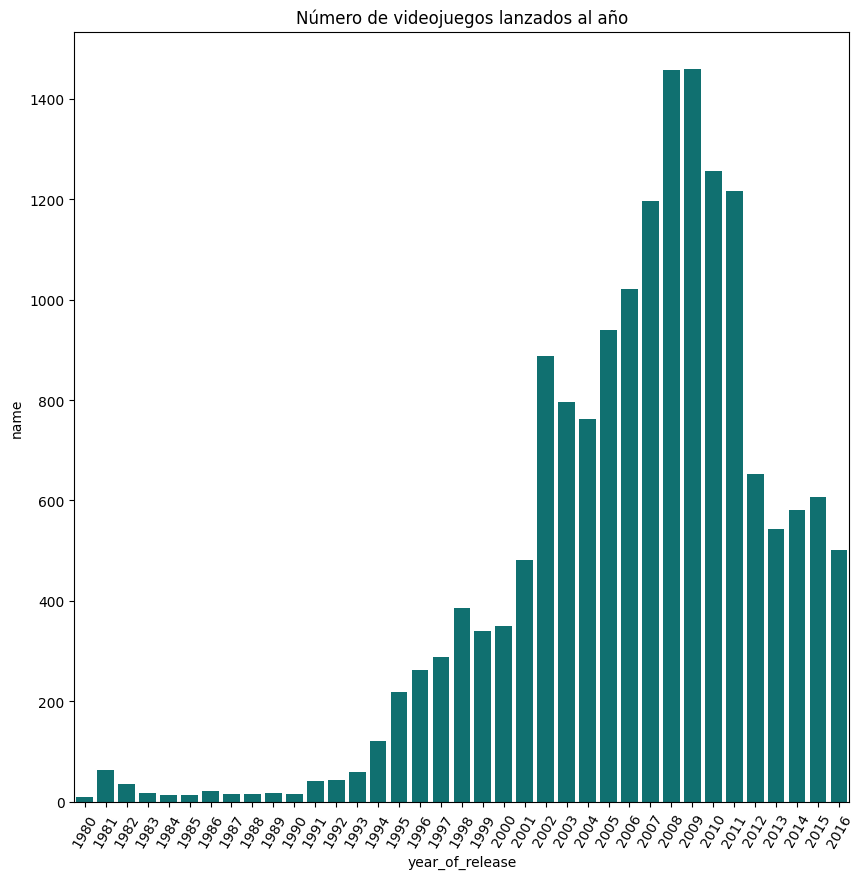

In [43]:
plt.figure(figsize=(10,10))
sns.barplot(data=games_by_year, y='name', x='year_of_release', color='teal')
plt.title('Número de videojuegos lanzados al año')
plt.xticks(rotation=60)
plt.show()


Se puede observar que hasta los años 90's el lanzamiento de títulos nuevos se muestra sin crecimiento. De hecho, en 1983 se dio la crisis de los videojuegos en Estados Unidos. Esto pudo haber causado un lento crecimiento en el lanzamiento anual (menos de 100 juegos al año) hasta 1991, a partir de donde la gráfica empieza a mostrar un cambio de tendencia. Esto posiblemente se dio gracias a la aceleración del mercado tecnológico. En esta década empezó el auge del sector tecnológico, generando mayor accesibilidad y popularización de la tecnología, a eso se suma la llegada del internet y los juegos en línea. Por último, la globalización también llevó a la expansión de los videojuegos hacia mercados nuevos. El pico lo tenemos en el año 2009, a partir del cual nuevamente hubo un claro decrecimiento. Recordemos que, si bien la industria tecnológica no fue directamente afectada en la crisis del 2008-2009, la desaceleración de la economía global pudo haber impactado en el mercado de videojuegos, sumado a la posible saturación del mercado, también a que con el tiempo, el desarrollo de juegos se ha estado volviendo cada vez más largo; por último, en estos años el modelo de negocio de la industria ha estado sufriendo cambios debido a la introducción de plataformas móviles y el crecimiento de los smartphones. Esta tendencia seguiría presente hasta el año 2016, donde dejamos de tener información al respecto.

Se puede considerar información ciertamente significativa a partir del año 1995, donde solo en ese año se lograron lanzar 219 títulos nuevos y el crecimiento llevó a la consolidación de la industria en los años posteriores.

## Ventas totales y anuales por plataforma <a id='f2'></a>

Para continuar con el análisis, esta vez graficaremos las ventas totales por plataforma, agrupando los datos y mostrándolos en un gráfico de barras:

In [44]:
sales_by_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
sales_by_platform.head(10)

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12
5,ps,730.86
6,gba,317.85
7,ps4,314.14
8,psp,294.05
9,pc,259.52


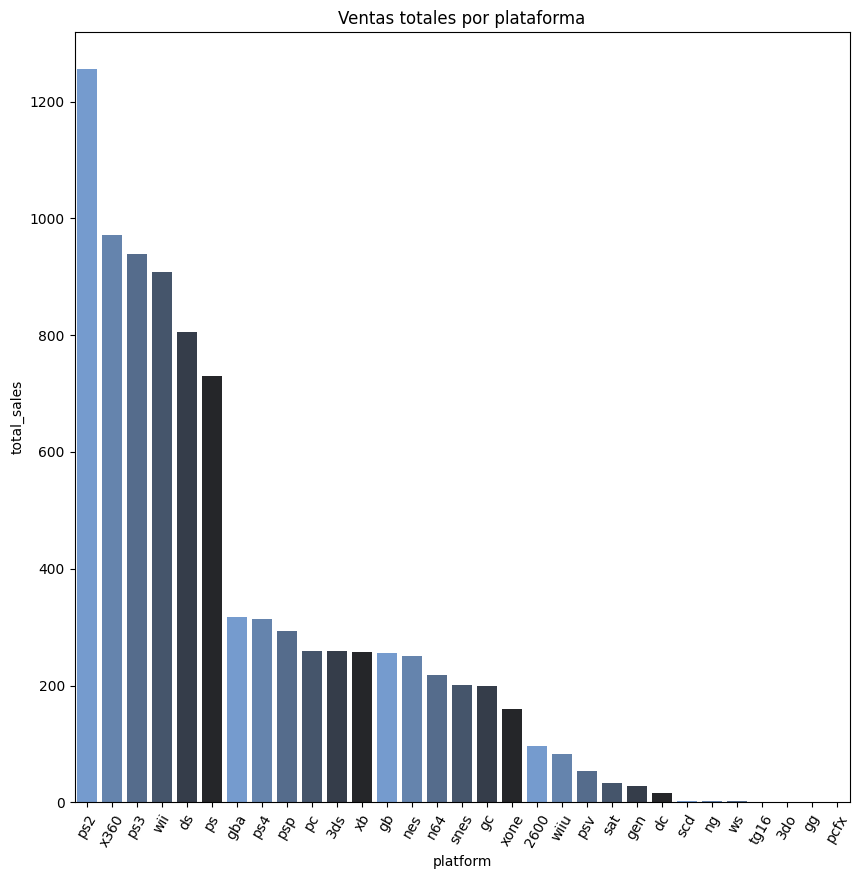

In [45]:
plt.figure(figsize=(10,10))
sns.barplot(data=sales_by_platform, x='platform', y='total_sales', palette=sns.dark_palette("#69d", reverse=True))
plt.title('Ventas totales por plataforma')
plt.xticks(rotation=60)
plt.show()

De las plataformas en el dataset, PS2 es la que acapara más ventas totales de forma histórica, con más de 1250 millones de dólares. Esto es acorde a la información oficial, ya que esta es la consola más vendida de la historia y posiblemente la más influyente de las últimas décadas. A esta plataforma le sigue la consola más exitosa de Microsoft: Xbox 360, con alrededor de 970 millones de dólares en ventas totales. Su contemporáneo y competidor directo, PS3, es quien sigue en la lista, por no mucho: 939 millones de dólares en ventas. Luego le siguen las plataformas de Nintendo: Wii y DS. La última consola representativa es la PS, ya que desde GBA en adelante las ventas se reducen a la mitad. 

Realizaremos un análisis temporal de las ventas de estas plataformas para observar su comportamiento. Para esto, crearemos un dataset que contenga datos de estas plataformas y luego lo graficaremos.

In [46]:
games_platform_most = games.query("platform == 'ps2' or platform == 'x360' or platform == 'ps3' or platform == 'wii' or platform == 'ds' or platform == 'ps'")
games_platform_most.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_esrb,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,everyone,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,everyone,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,everyone,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,everyone,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,everyone,28.91


Ahora graficaremos con el tiempo en el eje "x", las ventas en el eje "y" y daremos diferentes líneas para cada plataforma. Esto para poder observar el comportamiento de las plataformas a lo largo del tiempo.

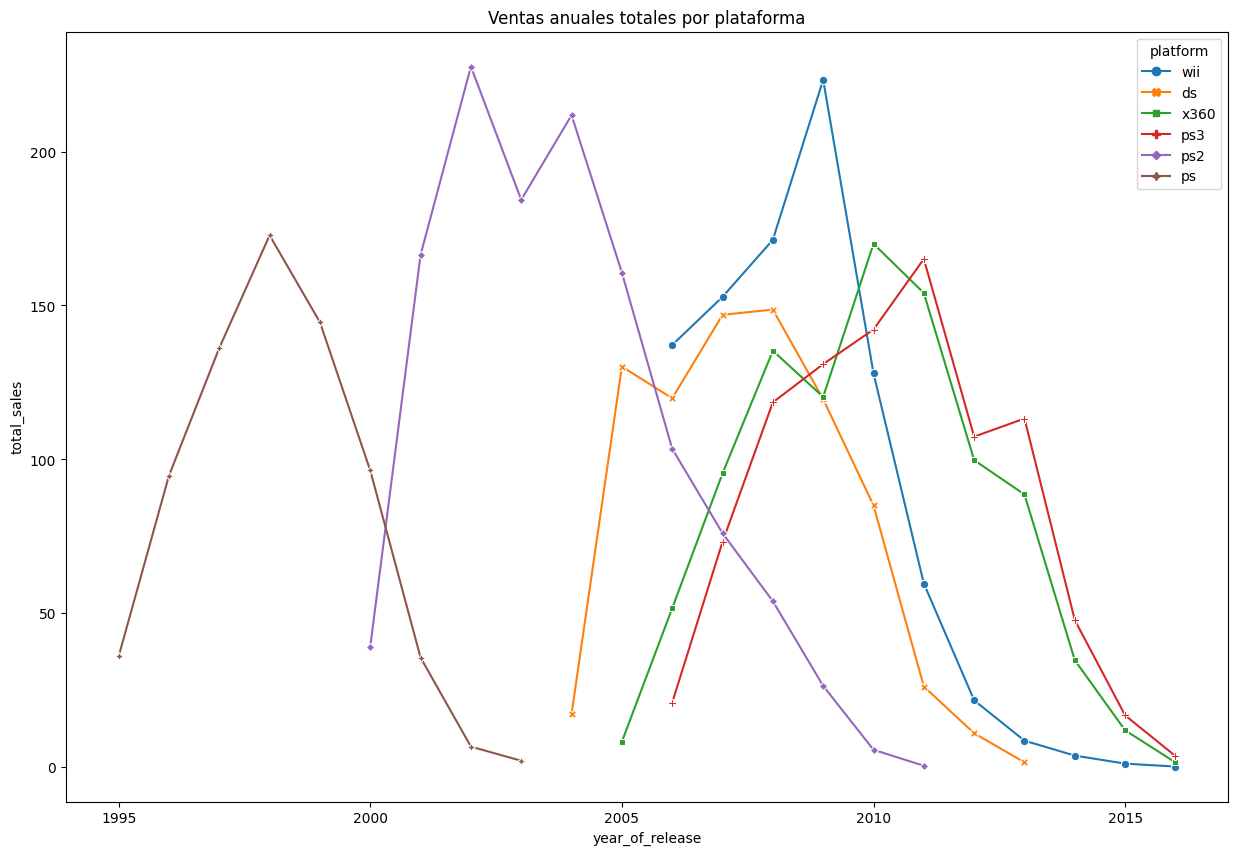

In [47]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=games_platform_most.query("year_of_release >= 1995"), 
            x='year_of_release',
            y='total_sales',
            hue='platform',
            style='platform',
            estimator='sum',
            markers=True,
            dashes=False,
            errorbar=None
)
plt.title('Ventas anuales totales por plataforma')
plt.show()

En este gráfico observamos el comportamiento a lo largo de los años de las seis consolas más exitosas según nuestros datos. Tomamos solo desde los años 1995 en adelante, debido a que la consola DS tenía un comportamiento atípico. En este análisis lo importante es observar el periodo de duración de una plataforma exitosa. En términos generales, se puede observar que una plataforma exitosa tiene alrededor de diez años de vida útil. Usaremos como muestra a las plataformas de Sony: PS, PS2 y PS3 de este gráfico, ya que en general, cada lanzamiento de una consola de nueva generación de Sony (ejemplo) viene acompañada de su análogo en la competencia, sea Nintendo o Microsoft (Xbox). El primer PS, empieza a tener información desde 1995, alcanza su pico unos tres años después (1998) y empieza a desacelerar hasta el 2003 aprox. Un poco antes, en el 2000, se lanza el PS2, este alcanzando su pico en los años 2002 y 2004, y debido a su excepcional recepción su vida útil se alarga hasta el 2011. Unos años antes se lanza el PS3 (2007), el cual llega a su pico cuatro años después (2011) y aún se muestra vigente para el 2006. 

En base a lo descrito tenemos un proceso cíclico, donde una plataforma se lanza, llega a su auge entre tres a cuatro años después de su lanzamiento, y antes de que quede obsoleta se lanza una generación sucesora, lo cual a la vez acelera el proceso de obsolescencia. Como aproximación podríamos concluir que las plataformas exitosas tienen una vida útil de 8 a 10 años. El detalle de este análisis es que cometemos un sesgo al extraer conclusiones en plataformas ciertamente exitosas. Esta aproximación debe ser contrastada con una distribución que muestre la vida útil de todas las plataformas y así poder generalizar de forma más consistente. Para esto, agruparemos nuestra data completa en base a la plataforma y extraeremos el mínimo y máximo registro del año, para luego obtener una aproximación del tiempo de vida útil restando estos valores:

In [48]:
platform_lifetime = games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetime['lifetime'] = platform_lifetime['max'] - platform_lifetime['min']
platform_lifetime.head(10)

,min,max,lifetime
platform,,,
2600,1980,1989,9
3do,1994,1995,1
3ds,2011,2016,5
dc,1998,2008,10
ds,1985,2013,28
gb,1988,2001,13
gba,2000,2007,7
gc,2001,2007,6
gen,1990,1994,4


En esta tabla tenemos una columna que aproxima la vida útil de cada plataforma: ``lifetime``, la cual es la diferencia entre el año máximo y mínimo de lanzamiento de videojuegos que se registran para cada plataforma. Para analizar los valores, obtendremos sus estadísticos principales y luego un gráfico de caja para observar su distribución:

In [49]:
platform_lifetime['lifetime'].describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: lifetime, dtype: float64

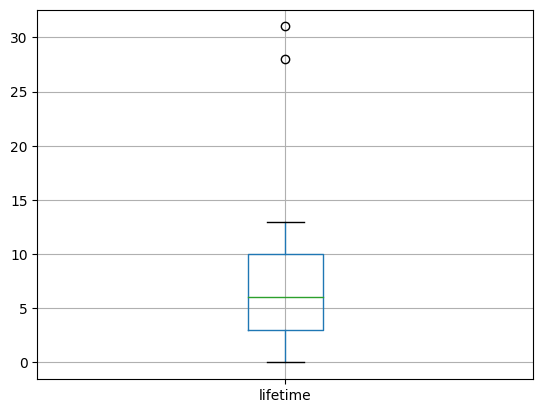

In [50]:
platform_lifetime.boxplot(column='lifetime')
plt.show()

De la tabla y el gráfico notamos que tenemos dos valores atípicos: para plataformas de PC (31 años) y Nintendo DS (28 años), siendo claros casos inusuales de plataformas con una muy larga vida útil. La media está alejada de la mediana por los outliers, así que tomaremos a la mediana que está en 6, el cual es un valor más representativo de la vida útil de una plataforma promedio. También tendremos en consideración del análisis anterior que llegar al pico de ventas toma alrededor de 4 años, periodo luego del cual las plataformas empiezan a desacelerar y decrecer hasta ser descontinuadas. Ya que nuestro análisis incluirá a las plataformas con mayor posible impacto, ordenaremos nuestro dataset agrupado y así lograremos ver las plataformas más recientes:

In [51]:
platform_lifetime.sort_values(by='min', ascending=False).head(10)

,min,max,lifetime
platform,,,
xone,2013,2016,3
ps4,2013,2016,3
wiiu,2012,2016,4
psv,2011,2016,5
3ds,2011,2016,5
wii,2006,2016,10
ps3,2006,2016,10
x360,2005,2016,11
psp,2004,2015,11


Podemos ver que las plataformas más recientes y con posible oportunidad de crecimiento son Xbox One, PS4, Nintendo WiiU. Incluso se podría incluir a PSV y 3DS, pero teniendo en cuenta que son consolas que ya están en decrecimiento por su antiguedad. En base a este criterio, para analizar posibles plataformas y videojuegos exitosos, tomaríamos datos desde estos últimos lanzamientos: 2011. Las demás ya han pasado el tiempo medio de vida útil y algunos ya tienen sus sucesores en el mercado, vaticinando su próxima obsolescencia.

**Decisión preliminar sobre el periodo relevante de análisis**

Teniendo en cuenta el análisis previo de un periodo de vida útil medio de unos 6 años (de 8 a 10 años para plataformas exitosas), que las plataformas más recientes empezaron entre los años 2011 y 2013, que en términos globales estaríamos entrando a un periodo de bajas ventas y nuevas plataformas; y que nuestro objetivo es determinar videojuegos potencialmente exitosos (rentables, en otras palabras), tomaremos datos desde el 2012. Tengamos en mente que lo ideal sería usar datos más recientes, como del año 2016 o 2015, para realizar una proyección que capture tendencias recientes, pero en nuestro contexto usar este intervalo corto de tiempo quita el componente cíclico del análisis y mucha información. De hecho, desde el 2012 ya se podría capturar una tendencia para los juegos recientes. Obtendremos nuestro dataset final filtrando a ``year_of_release`` a partir de 2012:

In [52]:
games_relevant = games.query("year_of_release >= 2012")
games_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2887 entries, 16 to 16712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2887 non-null   object 
 1   platform         2887 non-null   object 
 2   year_of_release  2887 non-null   int32  
 3   genre            2887 non-null   object 
 4   na_sales         2887 non-null   float64
 5   eu_sales         2887 non-null   float64
 6   jp_sales         2887 non-null   float64
 7   other_sales      2887 non-null   float64
 8   critic_score     1313 non-null   float64
 9   user_score       1532 non-null   float64
 10  rating           2887 non-null   object 
 11  rating_esrb      2887 non-null   object 
 12  total_sales      2887 non-null   float64
dtypes: float64(7), int32(1), object(5)
memory usage: 304.5+ KB


Tenemos aproximadamente la tercera parte de datos de nuestro dataset original. Nuestras columnas referidas a *score* mostraron una reducción proporcional en sus valores ausentes, sin grandes repercusiones. Con estos datos intentaremos determinar a las plataformas más "exitosas".

## Plataformas potencialmente rentables <a id='f3'></a>

Ya que hemos filtrado para el periodo 2010 en adelante, ya no contamos con plataformas antiguas que realmente no servían al análisis. Para analizar el comportamiento de las ventas del periodo relevante, nuevamente graficaremos las ventas totales anuales por plataforma utilizando el gráfico de líneas de Seaborn:

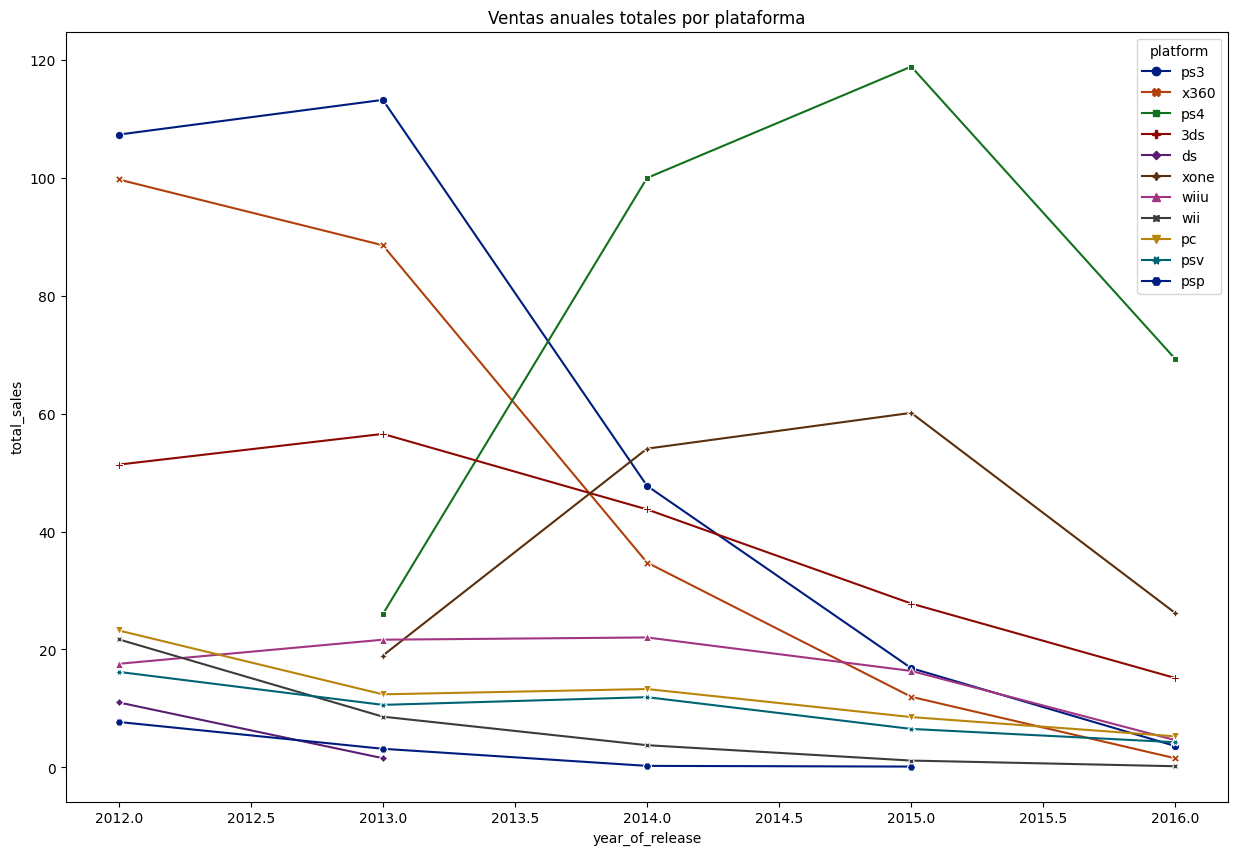

In [53]:
plt.figure(figsize=(15, 10))
sns.lineplot(
    data=games_relevant,
    y='total_sales',
    x='year_of_release',
    hue='platform', 
    estimator='sum',
    style='platform',
    dashes=False,
    markers=True,
    errorbar=None,
    palette='dark'
)
plt.title('Ventas anuales totales por plataforma')
plt.show()

Nuestro gráfico presenta a algunas plataformas que no son importantes y que agregan ruido a la información. Solo podemos destacar que muchos de ellos debido a su antiguedad ya están en su etapa final de vida, con cada vez menos ventas. Las líderes solían ser "x360" y "ps3", pero sus sucesoras son las que muestran un crecimiento potencial ("xone" y "ps4"). Para tomar en cuenta a las recientes plataformas dada su vida útil, usaremos a las cinco más recientes que determinamos líneas arriba: *xone, ps4, wiiu, psv y 3ds*. 

Haremos una excepción para el caso de "pc". Es conocido el amplio alcance que tienen las PC a nivel global, y aunque su nivel de ventas en juegos no sea creciente, tienen mucho margen potencial de crecimiento. También cuenta con gran diversidad de juegos que se adaptan a él, contrario a las plataformas y muchos de sus juegos propietarios. Por último, este gran margen de mejora puede hacer que con el tiempo las tendencias en la industria de videojuegos cambien, ofreciendo oportunidades emergentes, pero en el peor de los casos no se espera la desaparición absoluta de esta plataforma. En conclusión, esta plataforma por definición siempre presentará un gran potencial de crecimiento.

Entonces, el gráfico solo contendrá información de estas plataformas seleccionadas:

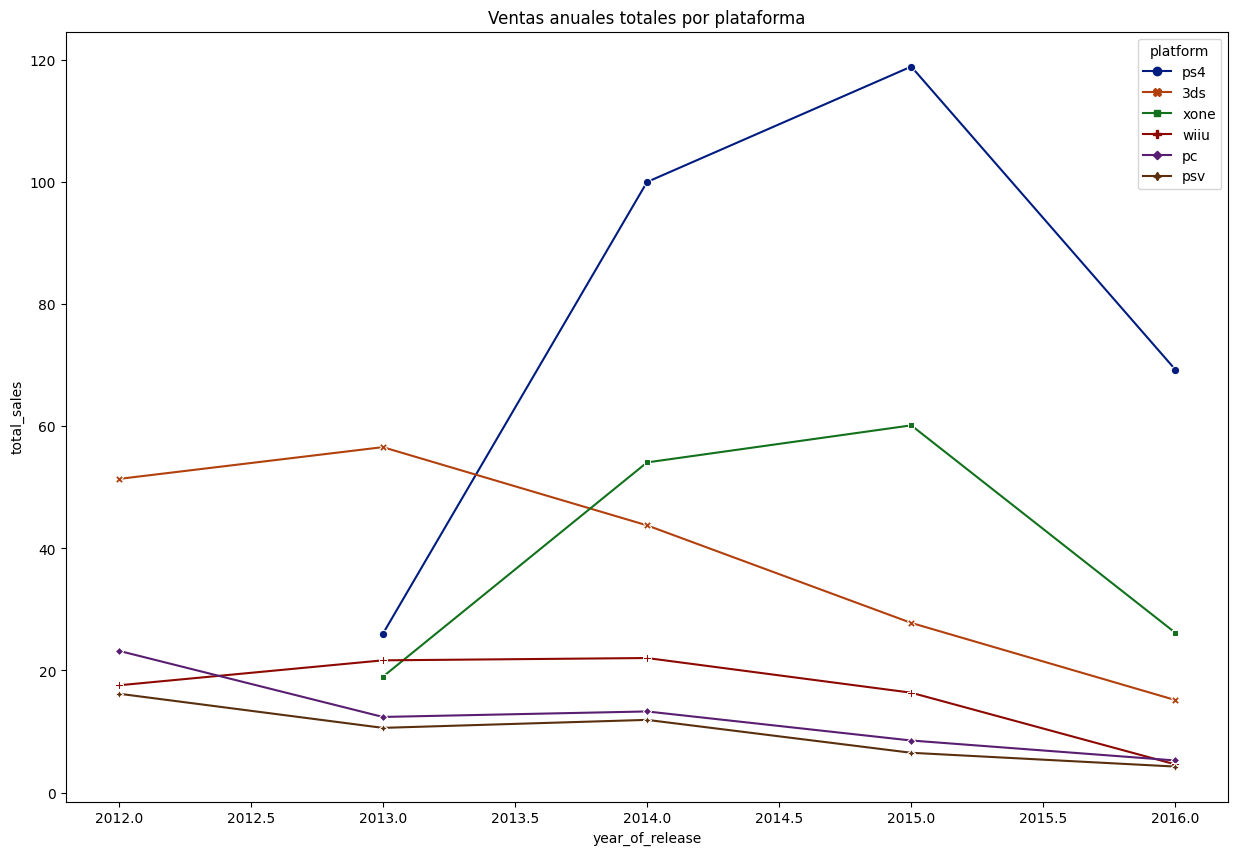

In [54]:
plt.figure(figsize=(15, 10))
sns.lineplot(
    data=games_relevant.query("platform == 'xone' or platform == 'ps4' or platform == 'wiiu' or platform == 'psv' or platform == '3ds' or platform =='pc'"),
    y='total_sales',
    x='year_of_release',
    hue='platform', 
    estimator='sum',
    style='platform',
    dashes=False,
    markers=True,
    errorbar=None,
    palette='dark'
)
plt.title('Ventas anuales totales por plataforma')
plt.show()

En este gráfico notamos la tendencia explicada anteriormente. Las plataformas que parecen haber llegado a su pico y estar en reducción son todas las demás anteriores obviadas y 3DS, PSV y quizá Wii U. Mientras que las *recientemente* lanzadas PS4 y Xbox One muestran una tendencia creciente. Las PC's aún parecen estar decreciendo, aunque esta plataforma siempre tendrá un gran margen potencial. No olvidemos que los datos del 2016 están incompletos y posiblemente no capturan la tendencia reciente de estas plataformas. Esta información nos servirá para determinar a las plataformas potencialmente rentables.

**Decisión final sobre las plataformas potencialmente rentables**

Después de haber filtrado y justificado el desarrollo y evolución de las diversas plataformas, nos quedamos con seis plataformas, principalmente por el posible potencial que presenta su relativo reciente lanzamiento (exceptuando PC, por su naturaleza propia): *PS4, 3DS, Xbox One, Wii U, PC y PSV*.

Nuestro dataset para continuar el análisis contendrá información de estas plataformas. Observando el gráfico tenemos que el periodo relevante para estas plataformas es correcto. Tomar datos desde antes no sería útil (solo para PC). Crearemos un nuevo dataset con información acorde a estos requerimientos:

In [55]:
games_potentially_profitable = games.query("year_of_release >= 2012 and platform in ('ps4', '3ds', 'xone', 'wiiu', 'pc', 'psv')")
games_potentially_profitable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 31 to 16712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1844 non-null   object 
 1   platform         1844 non-null   object 
 2   year_of_release  1844 non-null   int32  
 3   genre            1844 non-null   object 
 4   na_sales         1844 non-null   float64
 5   eu_sales         1844 non-null   float64
 6   jp_sales         1844 non-null   float64
 7   other_sales      1844 non-null   float64
 8   critic_score     921 non-null    float64
 9   user_score       990 non-null    float64
 10  rating           1844 non-null   object 
 11  rating_esrb      1844 non-null   object 
 12  total_sales      1844 non-null   float64
dtypes: float64(7), int32(1), object(5)
memory usage: 194.5+ KB


## Ventas globales por plataforma <a id='f4'></a>

Ya que tenemos a las plataformas con más potencial reciente para nuestro análisis, una forma de analizar su éxito es la cantidad de ventas totales de cada una. Ya que en apartados anteriores vimos su evolución, ahora lo analizaremos en diagramas de caja para observar si existen grandes diferencias entre sus ventas totales:

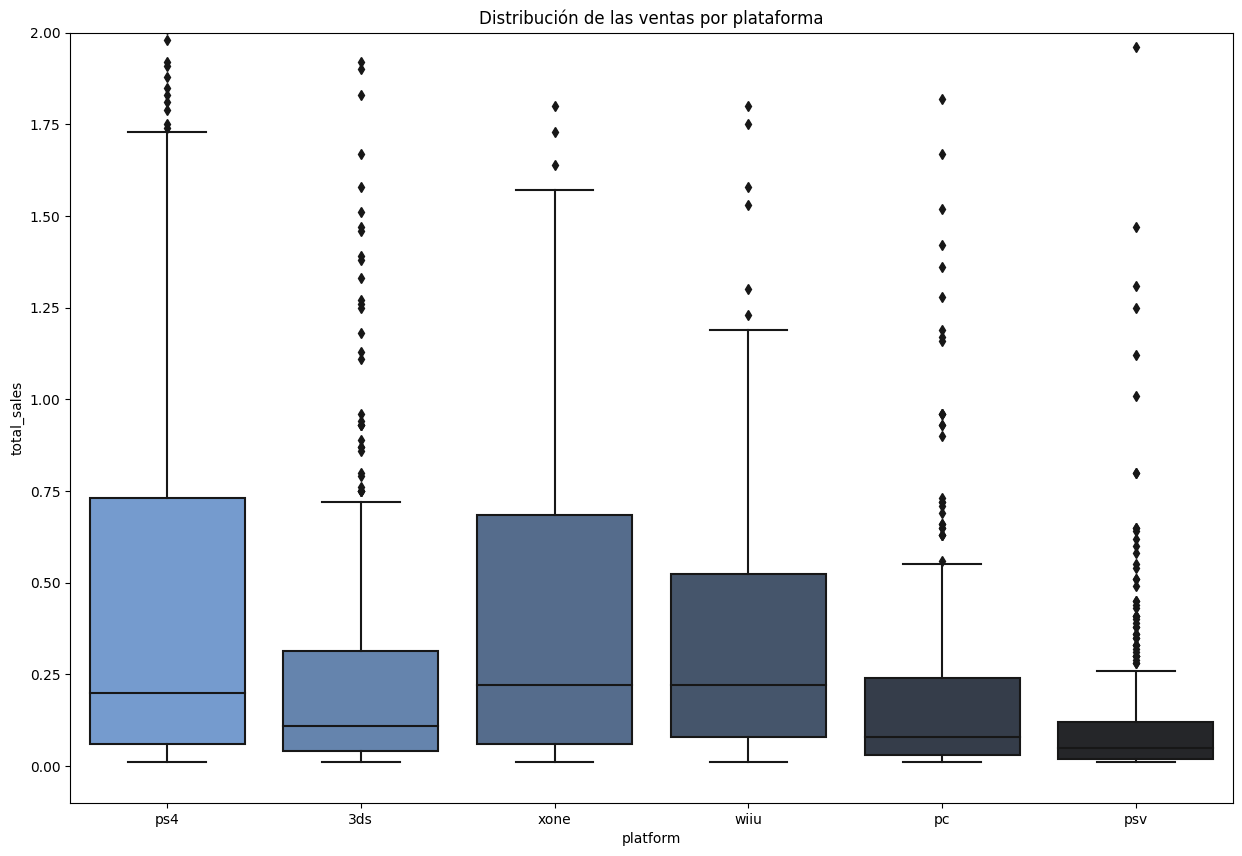

In [56]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=games_potentially_profitable, y='total_sales', x='platform', palette=sns.dark_palette("#69d", reverse=True))
plt.title('Distribución de las ventas por plataforma')
plt.ylim(-0.1, 2)
plt.show()

Agruparemos para obtener la media y mediana de este gráfico, ordenando por la media:

In [57]:
games_potentially_profitable.groupby('platform')['total_sales'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

,mean,median
platform,,
ps4,0.801378,0.20
xone,0.645020,0.22
wiiu,0.559116,0.22
3ds,0.491439,0.11
pc,0.250600,0.08
psv,0.120000,0.05


De todo esto podemos afirmar que las medianas solo son bastante menores en PC y PSV. De hecho, sus medias también presentan los valores más bajos. Las diferencias entre medianas para PS4, Xbox One y Wii U no son tan significativas. Sin embargo, las medias de PS4, Xbox One, Wii U y 3DS son mucho mayores a sus medianas, mostrando no solo un sesgo de los datos hacia valores superiores, sino también la oportunidad de crecimiento que afirmábamos en apartados previos. 

Podríamos concluir que, finalmente, las plataformas que muestran más potencial de éxito financiero son *PS4, Xbox One, Wii U y 3DS*, dado su comportamiento temporal, vida útil y ganancias medias. PC tiene un potencial implícito por su naturaleza, pero en las observaciones solo muestra constancia y estar abajo respecto a estas plataformas. A quien no le va muy bien en general es a PSV, quien a nivel temporal está decreciendo, su vida útil ya parece haberse agotado y sus ventas promedio y mediano son los más bajos comparados a las plataformas recientes. 

(Estos hallazgos parecen estar acorde a los registros históricos sucedidos e información más reciente a la que en la actualidad tenemos acceso).

Ya que logramos determinar a las plataformas más potencialmente rentables del dataset, nos falta conocer más patrones o posibles rasgos que hacen que los videojuegos sean exitosos. En este caso, empezaremos con las reseñas.

## Efectos de las reseñas en las ventas de un caso representativo: PS4 <a id='f5'></a>

Tal como empezábamos a explicar, tenemos que determinar qué puede originar o estar relacionado con el éxito de una plataforma o videojuego. Las reseñas son nuestro primer objetivo por una razón evidente: se espera que la puntuación de una reseña tenga un efecto directo en el éxito (ventas) de una plataforma. También porque en ambos casos se tratan de variables numéricas, con la cual el análisis puede volverse más paramétrico. Debido a que sería muy trabajoso y posiblemente obtengamos resultados parecidos, decidimos trabajar el análisis solo con la plataforma más "exitosa" como muestra representativa: *PS4*. Para esto, filtraremos nuestro dataset para esta plataforma:

In [58]:
ps4_data = games_potentially_profitable.query("platform == 'ps4'")
ps4_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16583
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    int32  
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       257 non-null    float64
 10  rating           392 non-null    object 
 11  rating_esrb      392 non-null    object 
 12  total_sales      392 non-null    float64
dtypes: float64(7), int32(1), object(5)
memory usage: 41.3+ KB


Para analizar una posible influencia de una variable numérica a otra, es posible y recomendable usar los coeficientes de correlación y los gráficos de dispersión. En la celda siguiente, obtendremos estos requerimientos, primero con ``critic_score``:

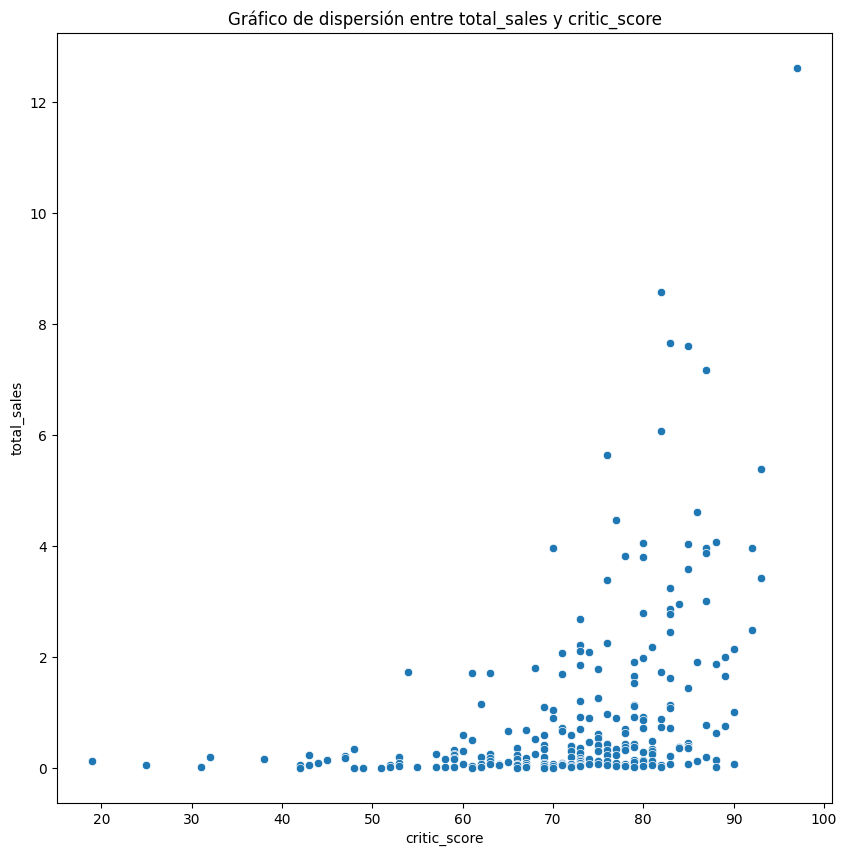

Coeficiente de correlación lineal de Pearson: 0.4065679020617816


In [59]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=ps4_data, y='total_sales', x='critic_score')
plt.title('Gráfico de dispersión entre total_sales y critic_score')
plt.show()

print(f"Coeficiente de correlación lineal de Pearson: {ps4_data['total_sales'].corr(ps4_data['critic_score'])}")

Teniendo en mente que ``critic_score`` está en una escala (casi) continua de 0 a 100, podemos notar una relación positiva en el gráfico de dispersión. El coeficiente de correlación reafirma esto dándonos un valor de 0.41, indicando una correlación lineal moderada. Hay que tener en cuenta que muchas veces las reseñas de la crítica especializada puede afectar de manera significativa en el éxito de un juego o plataforma. No olvidemos que las ventas también están sujetas a otros factores, eso justificaría la correlación moderada observada.  

Podríamos afirmar que la relación directa existe entre las reseñas de los críticos y las ventas totales, aunque de forma moderada. 

Ahora corresponde un análisis análogo con ``user_score``.

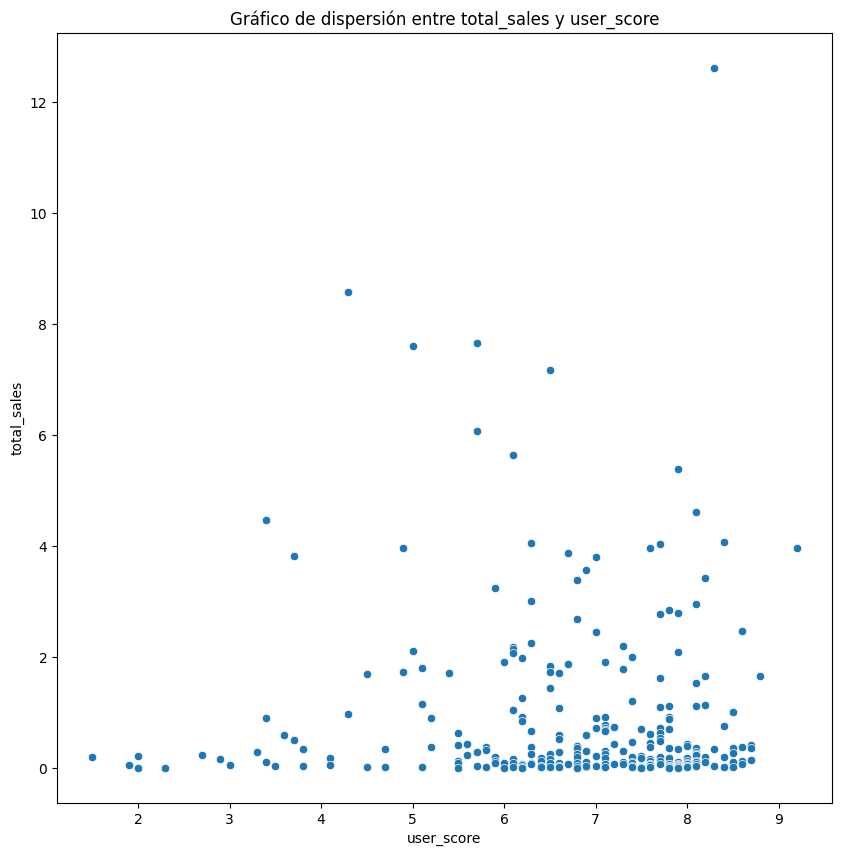

Coeficiente de correlación lineal de Pearson: -0.03195711020455643


In [60]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=ps4_data, y='total_sales', x='user_score')
plt.title('Gráfico de dispersión entre total_sales y user_score')
plt.show()

print(f"Coeficiente de correlación lineal de Pearson: {ps4_data['total_sales'].corr(ps4_data['user_score'])}")

En este caso, la escala de ``user_score`` es de 0 a 10. Tanto en el gráfico como en el coeficiente de correlación no se logra observar el patrón lineal positivo esperado. Es posible también que se trate de un patrón o relación más compleja que no logramos detectar visual o numéricamente, pero no se ve muy probable. Es mucho más razonable pensar que las reseñas de los usuarios no sean un buen indicador del éxito de un juego o plataforma, debido a que no es especializada y resulta menos objetiva que las reseñas de críticos, y posiblemente el éxito de un videojuego se vea más afectada por otros factores como la publicidad, alcance, etc.

Podemos afirmar, por tanto, que no existe una relación lineal entre la puntuación dada por los usuario y el nivel de ventas totales, para este set de datos proporcionado.

**Pequeñas conclusiones del apartado**

Podemos concluir que las reseñas pueden afectar el éxito de un usuario, pero depende de quién las de: las reseñas de la crítica especializada mostraron una correlación moderada hacia las ventas. Sin embargo, las reseñas de los usuarios no parecen relacionarse con las ventas totales de una plataforma. 

(Parece que hablar bien de tu videojuego favorito no lo ayuda significativamente).

## Videojuegos más exitosos por plataforma <a id='f6'></a>

Ahora compararemos a los videojuegos más exitosos para cada plataforma. Para esto, usaremos una tabla pivote con márgenes, ordenaremos por totales y solo obtendremos los 10 primeros videojuegos:

In [61]:
top_games = games_potentially_profitable.pivot_table(
    index='name',
    columns='platform',
    values='total_sales',
    aggfunc='sum',
    margins=True
).sort_values(by='All', ascending=False).head(11)
top_games

platform,3ds,pc,ps4,psv,wiiu,xone,All
name,,,,,,,
All,194.61,62.65,314.14,49.44,82.19,159.32,862.35
call of duty: black ops 3,NaN,0.26,14.63,NaN,NaN,7.39,22.28
grand theft auto v,NaN,1.17,12.62,NaN,NaN,5.47,19.26
pokemon x/pokemon y,14.60,NaN,NaN,NaN,NaN,NaN,14.60
call of duty: advanced warfare,NaN,0.41,7.66,NaN,NaN,5.26,13.33
fallout 4,NaN,1.28,7.17,NaN,NaN,4.22,12.67
super smash bros. for wii u and 3ds,7.55,NaN,NaN,NaN,4.87,NaN,12.42
star wars battlefront (2015),NaN,0.55,7.98,NaN,NaN,3.66,12.19
fifa 16,NaN,0.20,8.58,NaN,NaN,3.25,12.03


Ahora falta ordenar un poco y eliminar los totales, ya que solo sirvieron para ordenar la tabla y no servirán para el siguiente paso:

In [62]:
top_games = top_games.reset_index().drop(0)
top_games

platform,name,3ds,pc,ps4,psv,wiiu,xone,All
1,call of duty: black ops 3,NaN,0.26,14.63,NaN,NaN,7.39,22.28
2,grand theft auto v,NaN,1.17,12.62,NaN,NaN,5.47,19.26
3,pokemon x/pokemon y,14.60,NaN,NaN,NaN,NaN,NaN,14.60
4,call of duty: advanced warfare,NaN,0.41,7.66,NaN,NaN,5.26,13.33
5,fallout 4,NaN,1.28,7.17,NaN,NaN,4.22,12.67
6,super smash bros. for wii u and 3ds,7.55,NaN,NaN,NaN,4.87,NaN,12.42
7,star wars battlefront (2015),NaN,0.55,7.98,NaN,NaN,3.66,12.19
8,fifa 16,NaN,0.20,8.58,NaN,NaN,3.25,12.03
9,pokemon omega ruby/pokemon alpha sapphire,11.68,NaN,NaN,NaN,NaN,NaN,11.68
10,fifa 17,NaN,0.12,7.60,NaN,NaN,2.65,10.37


Usaremos los nombres de esta tabla para filtrar el dataset completo, y los valores de esta tabla para corroborar que el gráfico sea correcto. En este caso, se recomienda un gráfico de barras agrupado para observar las diferencias entre plataformas:

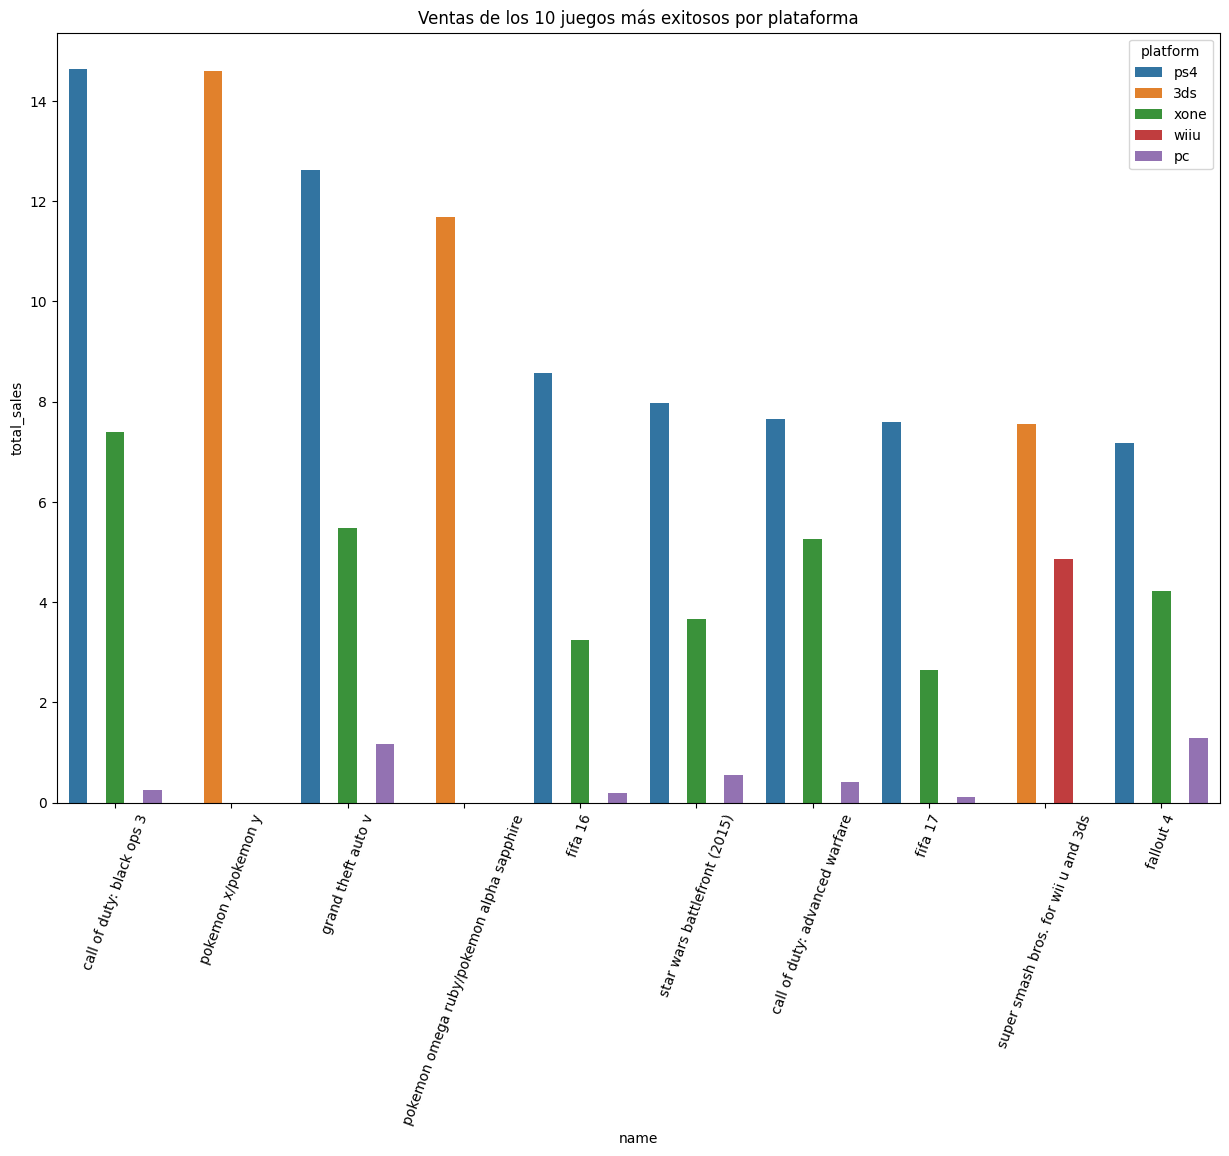

In [63]:
plt.figure(figsize=(15, 10))
sns.barplot(data=games_potentially_profitable.query("name in @top_games.name"),
            x='name',
            y='total_sales',
            hue='platform',
            estimator='sum'
)
plt.xticks(rotation=70)
plt.title('Ventas de los 10 juegos más exitosos por plataforma')
plt.show()

El gráfico es coherente a la tabla pivote anterior mostrada. Podemos ver que seis de los diez juegos más exitosos tienen como plataforma principal a PS4, seguido del Xbox One. PC representa un pequeño porcentaje en estos seis juegos. Podemos afirmar entonces que los videojuegos exitosos de este primer grupo son liderados por la plataforma PS4. El segundo grupo estaría formado por los cuatro juegos restantes que son propietarios de Nintendo y sus plataformas, lo que explica la ausencia de las otras plataformas, aunque eso no quita que también tenga ventas muy elevadas y sin competencia alguna. 

De hecho, en este caso podríamos recomendar enfocarse en videojuegos de plataformas de Nintendo, ya que cuatro de los diez juegos más exitosos son de esta plataforma y no tiene competencia alguna. Podría decirse que un videojuego de Nintendo tiene buenas posibilidades de ser un éxito.

En segundo lugar, para los restantes videojuegos abiertos a más plataformas existe una gran competencia por plataforma, pero el líder es PS4 por un buen margen. Le sigue la consola Xbox One, pero algo detrás. En estas características podríamos fijarnos y enfocarnos al momento de realizar una campaña publictaria.

## Ventas de videojuegos por género <a id='f7'></a>

Nos queda analizar nuestra lista de videojuegos por género, así veremos si el género afecta o no al éxito financiero de cierto videojuego. Para esto crearemos una tabla dinámica que nos devuelva las ventas totales para cada género. También agregaremos el número de títulos por género como dato extra:

In [64]:
games_by_genre = games_potentially_profitable.pivot_table(
    index='genre', 
    values='total_sales',
    aggfunc=['sum', 'count']
).reset_index()
games_by_genre.columns = ['genre', 'total_sales', 'number_of_games']
games_by_genre = games_by_genre.sort_values(by='total_sales', ascending=False).reset_index(drop=True)
games_by_genre


,genre,total_sales,number_of_games
0,action,227.44,660
1,shooter,171.64,136
2,role-playing,147.69,263
3,sports,96.21,142
4,platform,51.66,64
5,misc,42.58,129
6,racing,33.52,72
7,simulation,31.32,57
8,fighting,28.16,56
9,adventure,18.15,187


Con estos datos podemos realizar un gráfico de barras simple:

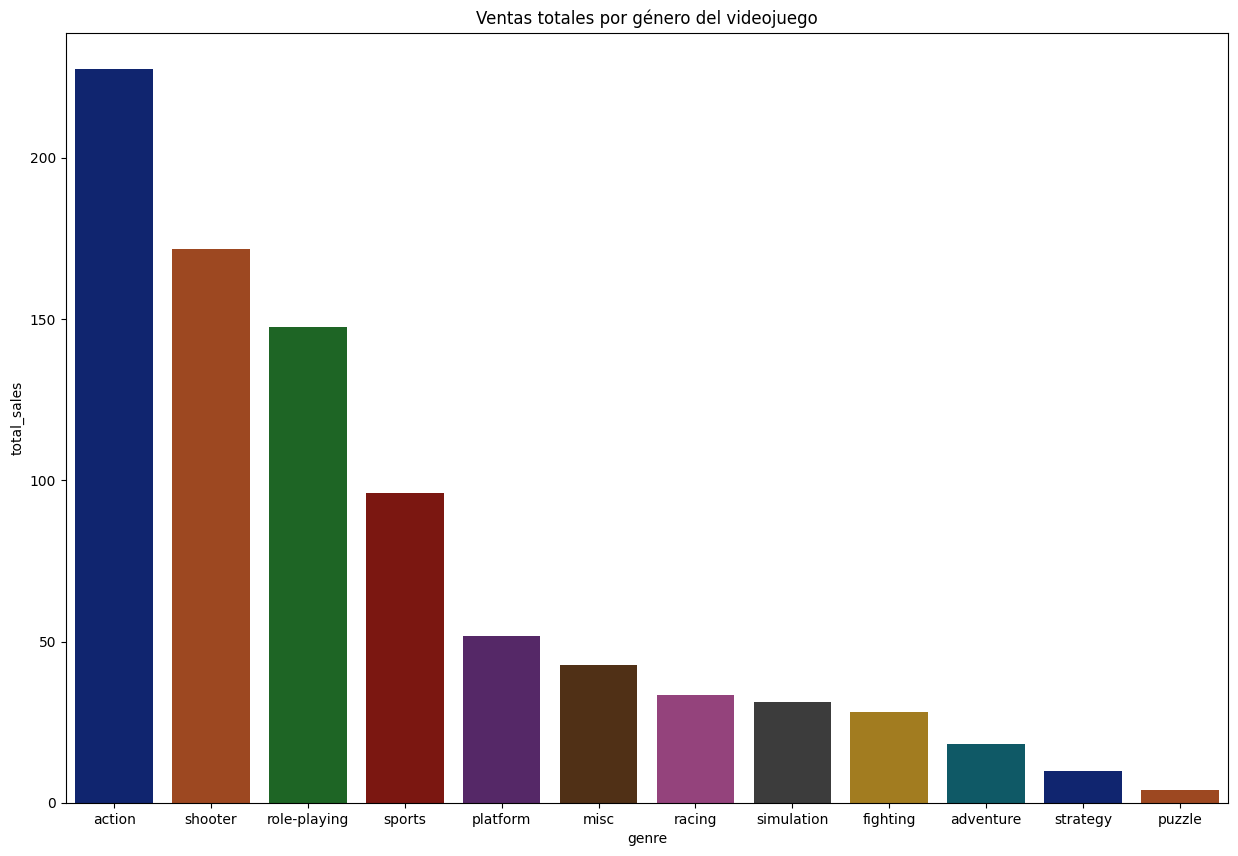

In [65]:
plt.figure(figsize=(15,10))
sns.barplot(data=games_by_genre, x='genre', y='total_sales', palette='dark')
plt.title('Ventas totales por género del videojuego')
plt.show()

En este caso, el género "action" resulta el más rentable y exitoso por un amplio margen. Luego le siguen "shooter", "role-playing" y "sports". Podríamos afirmar que un videojuego exitoso generalmente se ve asociado al género acción, "shooter" o incluso a "role-playing", así que este debería ser el foco para una campaña de videojuegos.

Ahora también analizaremos la cantidad de videojuegos para cada género lanzado. Esto también puede indicar su relevancia y más diversidad al momento de ofrecer un videojuego potencialmente exitoso al usuario. 

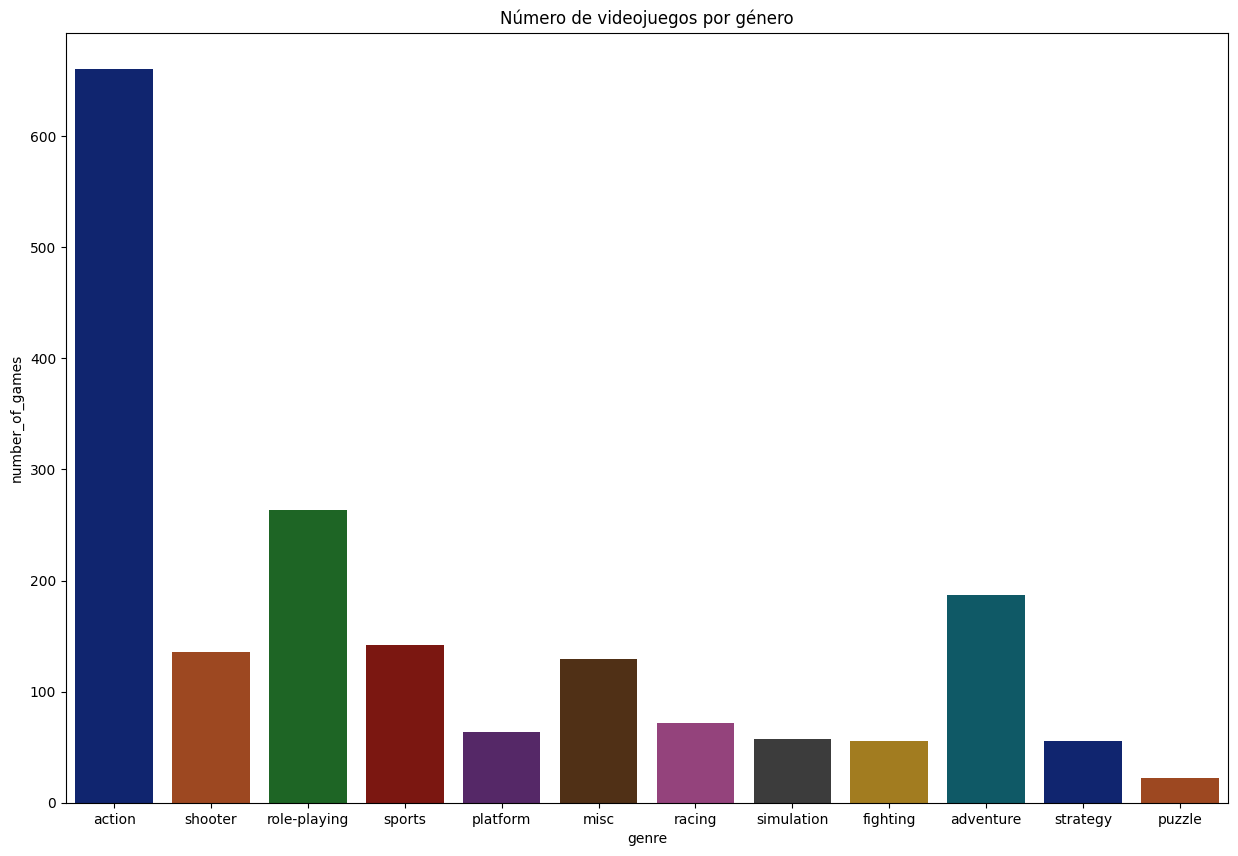

In [66]:
plt.figure(figsize=(15,10))
sns.barplot(data=games_by_genre, x='genre', y='number_of_games', palette='dark')
plt.title('Número de videojuegos por género')
plt.show()

El tipo de videojuego más lanzado es el de acción por un gran margen. Esto muestra una gran competencia entre videojuegos de acción posiblemente debido a que es el género con más ventas (ciertamente preferido por los usuarios). Le siguen los de tipo "role-playing", "adventure", "shooter" y "sports". 

En general, se podría recomendar enfocar las campañas de publicidad en juegos de géneros "action", "shooter" y "role-playing", por su alta preferencia, ventas y producción. Un detalle interesante es que el género "shooter" y "role-playing" generan ingresos comparables al de "action", pero tienen significativamente menos lanzamientos respecto a "action". Esto significa que sus videojuegos tienen potencial de ser muy rentables en términos porcentuales (y absolutos) y tener poca competencia. 

**Conclusiones intermedias**

Después de este análisis general, hasta ahora podríamos dar las características de un videojuego exitoso para el año siguiente (2017) en base a los hallazgos principales de los datos observados. Estos patrones son:
* Probablemente tienen buenas reseñas por parte de la crítica.
* Probablemente sea lanzado en una consola PS4 o una reciente de Nintendo.
* Probablemente sea de género "action", "shooter" o "role-playing".

Un videojuego con estas características juntas tiene buenas posibilidades de ser exitoso en términos generales. Sin embargo, este comportamiento puede variar según el tipo de usuario y mercado que lo consume; es decir, según la región, el cual es el factor nos queda restante del análisis de los patrones de éxito de los videojuegos.

## Perfil de usuario por región <a id='f8'></a>

Este es el último factor relevante al momento de analizar los rasgos de un videojuego exitoso. Los distintos mercados globales generalmente tienen comportamientos y gustos (relativamente) diferentes debido a características propias como su cultura, nivel de ingresos, acceso tecnológico, legado, educación, etc. En nuestro dataset (y en el mundo real), tenemos tres mercados principales  para la industria de los videojuegos, tanto por cultura, acceso y nivel de ingresos: Norteamérica, Europa y Japón. Crearemos un perfil de usuario para cada una de estas regiones principales y así notar sus diferencias de comportamiento.

Para esto, crearemos una función que clasifique nuestra data por región, el cual nos devolverá un resumen de las principales plataformas, géneros y ratings preferidos por sus usuarios respectivos, tomando su relevancia por las ventas totales generadas. La función contendrá lo necesario para realizar este proceso, con los siguientes parámetros:

* ``data``: dataset general con todos los datos.
* ``region``: ventas de la región específica (columna del dataset) con la que se hará la clasificación y filtro.
* ``name``: nombre de la región en lenguaje cotidiano.
* ``color``: color de los gráficos.

In [67]:
def region_profile(data, region, name, color):
    platform = data.pivot_table(index='platform', values=region, aggfunc='sum')
    platform_top = platform.sort_values(by=region, ascending=False).head()
    platform_top.plot(y=region, kind='bar', color=color , figsize=(10, 10))
    plt.title(f"Plataformas principales en {name}")
    plt.show()
    print()
    print(platform_top)
    print("-----------------------------")
    
    print()
    genre = data.pivot_table(index='genre', values=region, aggfunc='sum')
    genre_top = genre.sort_values(by=region, ascending=False).head()
    genre_top.plot(y=region, kind='bar', color=color , figsize=(10, 10))
    plt.title(f"Géneros principales en {name}")
    plt.show()
    print()
    print(genre_top)
    print("-----------------------------")
    
    print()
    rating = data.pivot_table(index='rating', values=region, aggfunc='sum')
    rating_top = rating.sort_values(by=region, ascending=False).head()
    rating_top.plot(y=region, kind='bar', color=color , figsize=(10, 10))
    plt.title(f"Principales ratings en {name}")
    plt.show()
    print()
    print(rating_top)
    print("-----------------------------")


**Perfil de usuario para Norteamérica**

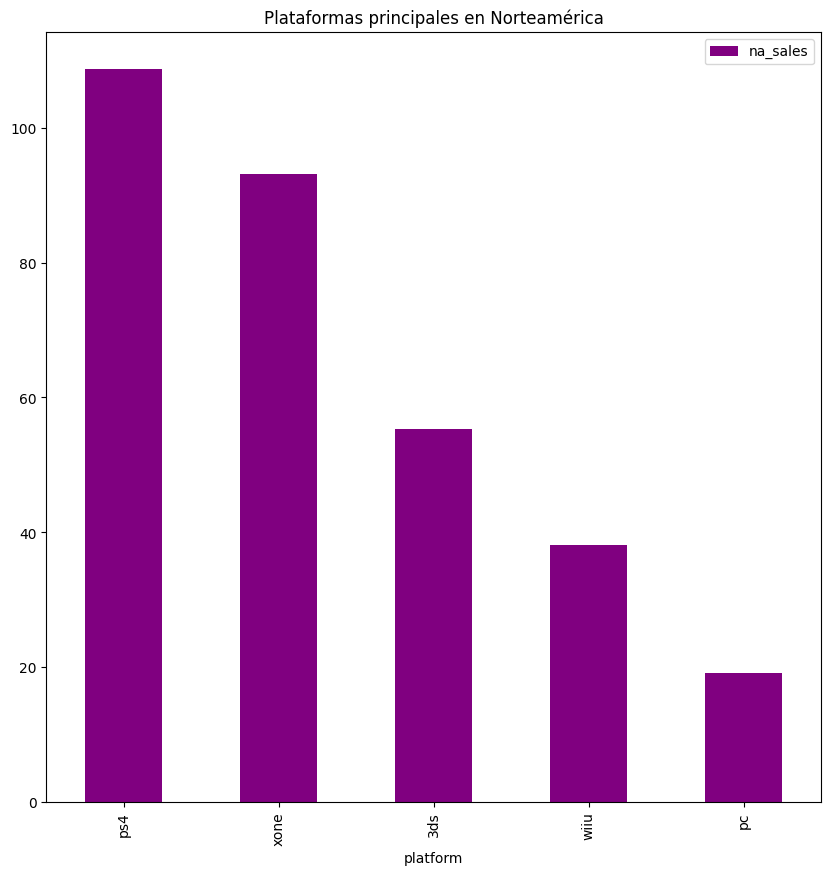


          na_sales
platform          
ps4         108.74
xone         93.12
3ds          55.31
wiiu         38.10
pc           19.12
-----------------------------



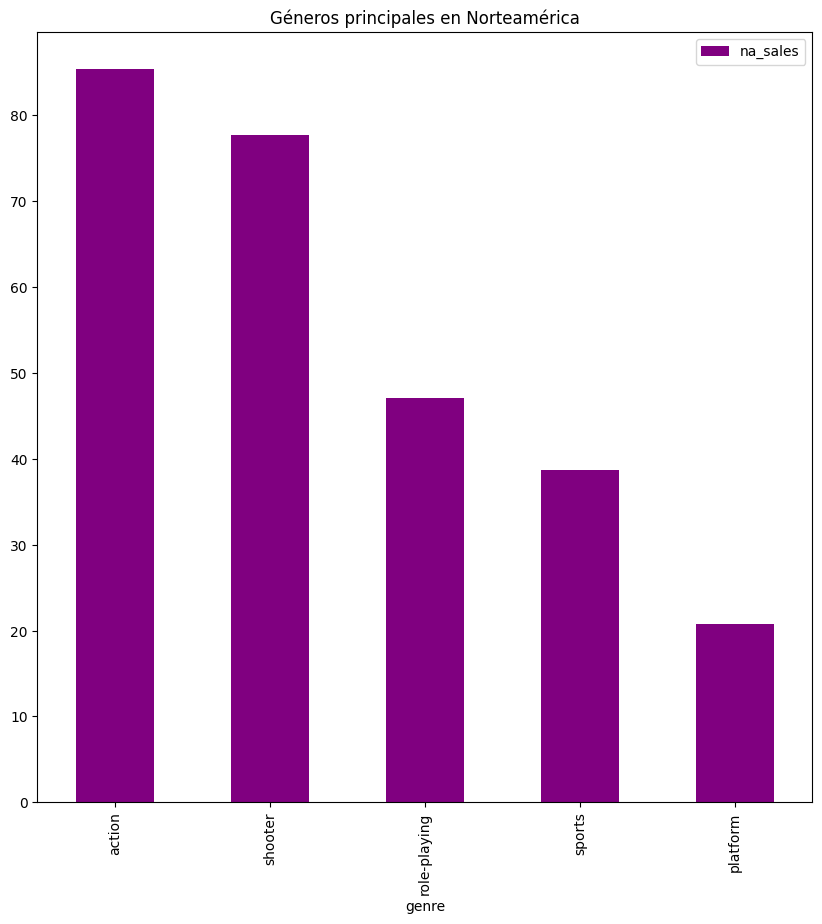


              na_sales
genre                 
action           85.40
shooter          77.76
role-playing     47.03
sports           38.71
platform         20.82
-----------------------------



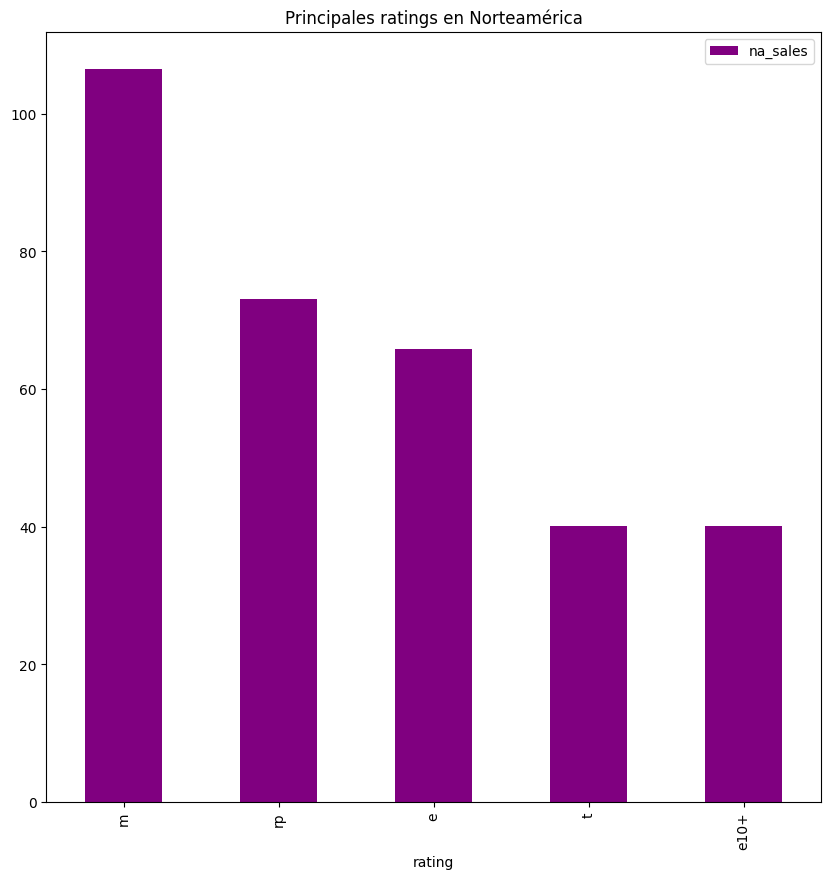


        na_sales
rating          
m         106.53
rp         73.03
e          65.82
t          40.08
e10+       40.02
-----------------------------


In [68]:
region_profile(games_potentially_profitable, 'na_sales', 'Norteamérica', 'purple')

Para la región de Norteamérica tenemos los siguientes patrones por cada gráfico:
* Las cinco plataformas líderes siguen el siguiente orden de importancia: PS4, Xbox One, 3DS , Wii U y PC. Los tres primero acaparan la mayor parte de las ventas de manera significativa. Esto no se aleja mucho del análisis global realizado previamente.
* Los cinco géneros líderes están de acuerdo al siguiente orden de relevancia: "action", "shooter", "role-playing", "sports" y "platform". Los tres primeros acaparan la mayor parte de las ventas, pero tiene una distribución algo más uniforme.
* Los ratings más relevantes de los videojuegos siguen el siguiente orden en importancia: M, RP, E, T y E10+. La distribución también es algo más homogénea y si no tenemos en cuenta a RP, M y E son las más importantes.

En conclusión, para este mercado el comportamiento no se aleja mucho de las tendencias generales encontradas con los datos globales. Plataformas como PS4, Xbox One y 3DS; géneros como "action", "shooter" y "role-playing"; y ratings como "M" o "E" son características de posibles juegos exitosos y posibles centros de foco al momento de realizar promociones segmentadas por mercado.

Para tener idea de qué tipos de juegos podrían servir como ejemplo, mostraremos un ejemplo con las condiciones para este mercado:

In [69]:
games_potentially_profitable.query("platform == 'xone' and genre == 'action' and rating == 'm'").head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_esrb,total_sales
165,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,m,mature,5.47
373,assassin's creed: unity,xone,2014,action,2.27,0.90,0.00,0.33,72.0,4.1,m,mature,3.50
720,assassin's creed iv: black flag,xone,2013,action,1.48,0.55,0.00,0.21,NaN,7.4,m,mature,2.24
1175,dead rising 3,xone,2013,action,1.06,0.35,0.01,0.15,78.0,6.8,m,mature,1.57
1179,watch dogs,xone,2014,action,0.90,0.53,0.00,0.14,78.0,5.8,m,mature,1.57


**Perfil de usuario para Europa**

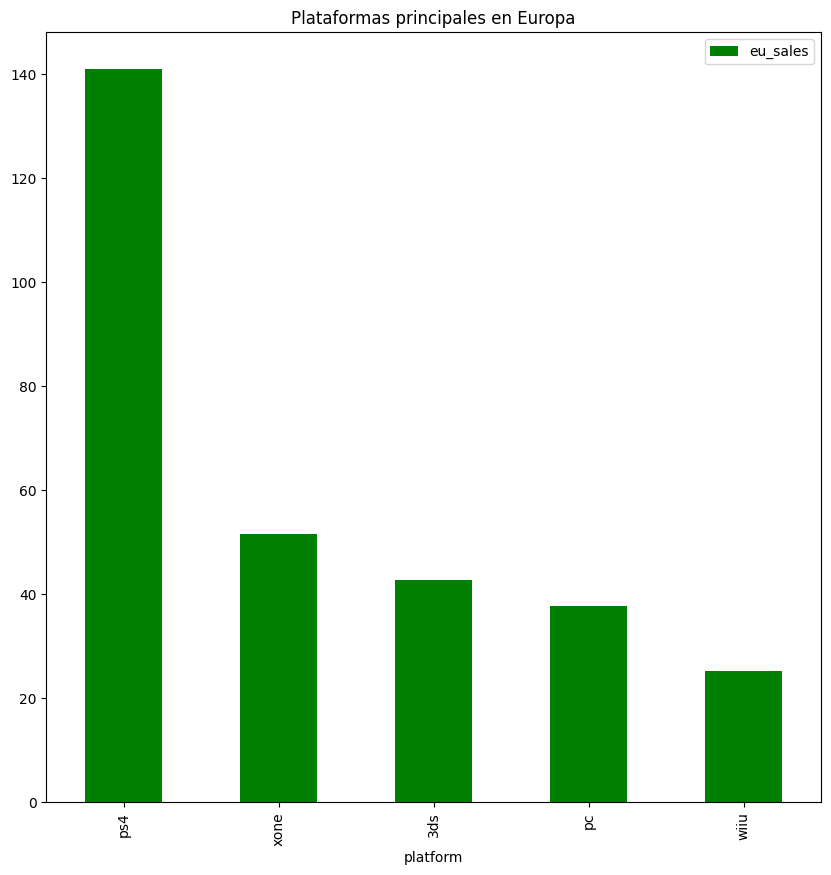


          eu_sales
platform          
ps4         141.09
xone         51.59
3ds          42.64
pc           37.76
wiiu         25.13
-----------------------------



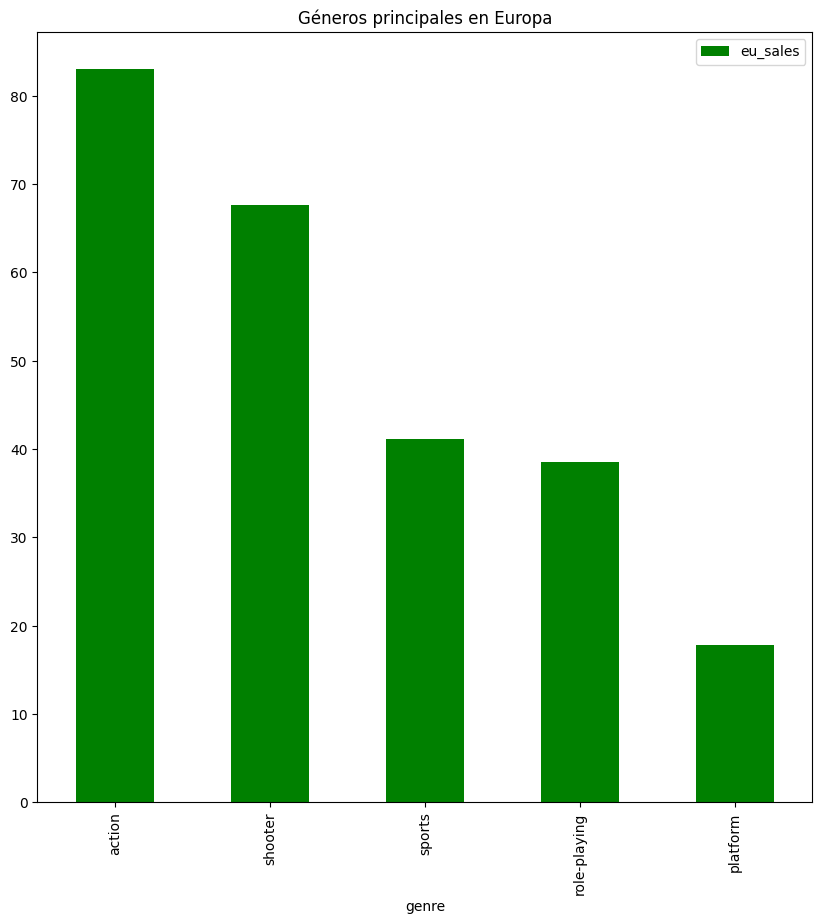


              eu_sales
genre                 
action           83.00
shooter          67.62
sports           41.10
role-playing     38.53
platform         17.81
-----------------------------



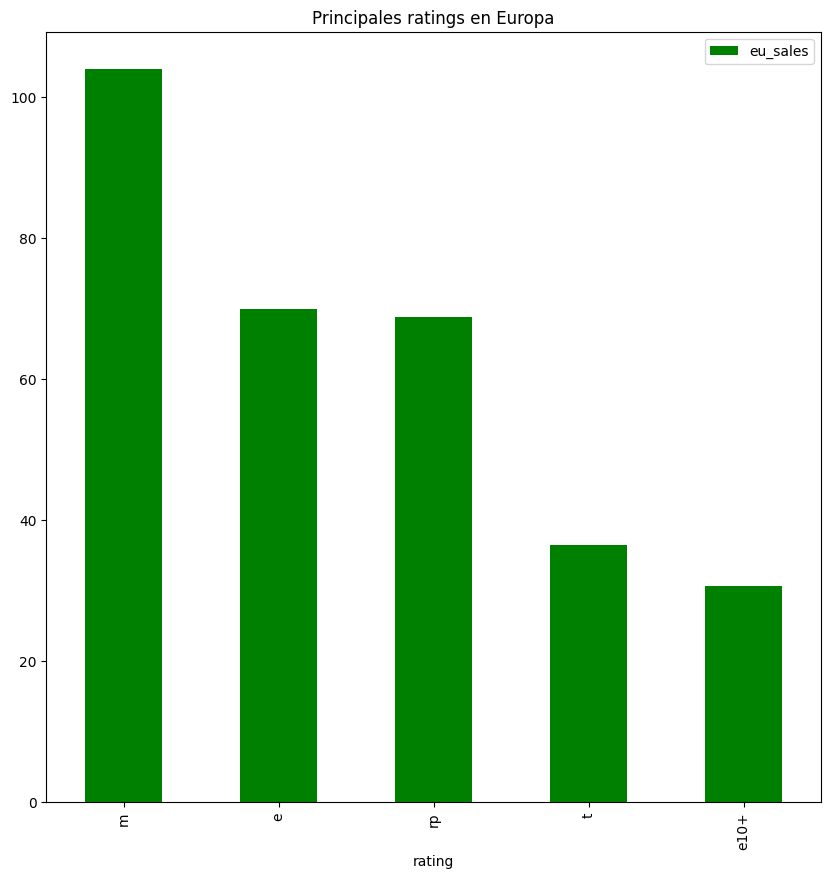


        eu_sales
rating          
m         103.98
e          69.92
rp         68.71
t          36.40
e10+       30.61
-----------------------------


In [70]:
region_profile(games_potentially_profitable, 'eu_sales', 'Europa', 'green')

Para la región de Europa tenemos los siguientes patrones por cada gráfico:
* Las cinco plataformas líderes siguen el siguiente orden de importancia: PS4, Xbox One, 3DS, PC, y Wii U. El primero acapara la mayor parte de las ventas de manera significativa. 
* Los cinco géneros líderes están de acuerdo al siguiente orden de relevancia: "action", "shooter", "sports", "role-playing" y "platform". Los dos primeros acaparan la mayor parte de las ventas, el resto teniendo una distribución algo más uniforme.
* Los ratings más relevantes de los videojuegos siguen el siguiente orden en importancia: M, E, RP, T y E10+. La más importante es M y E tiene un porcentaje relativamente menor en el segundo lugar.

En conclusión, para este mercado el comportamiento mostró cierto cambio de preferencias. Plataformas como PS4, 3DS y PC; géneros como "action", "shooter" y "sports"; y ratings como "M" o "E" son características de posibles juegos exitosos y posibles centros de foco al momento de realizar promociones segmentadas por mercado.

Para tener idea de qué tipos de juegos podrían servir como ejemplo, mostraremos un ejemplo con las condiciones para este mercado:

In [71]:
games_potentially_profitable.query("platform == 'ps4' and genre == 'action' and rating == 'm'").head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_esrb,total_sales
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,mature,12.62
295,watch dogs,ps4,2014,action,1.40,1.90,0.11,0.64,80.0,6.3,m,mature,4.05
304,assassin's creed: unity,ps4,2014,action,1.19,2.07,0.08,0.62,70.0,4.9,m,mature,3.96
305,batman: arkham knight,ps4,2015,action,1.53,1.69,0.10,0.64,87.0,7.6,m,mature,3.96
390,metal gear solid v: the phantom pain,ps4,2015,action,1.09,1.36,0.49,0.48,93.0,8.2,m,mature,3.42


**Perfil de usuario para Japón**

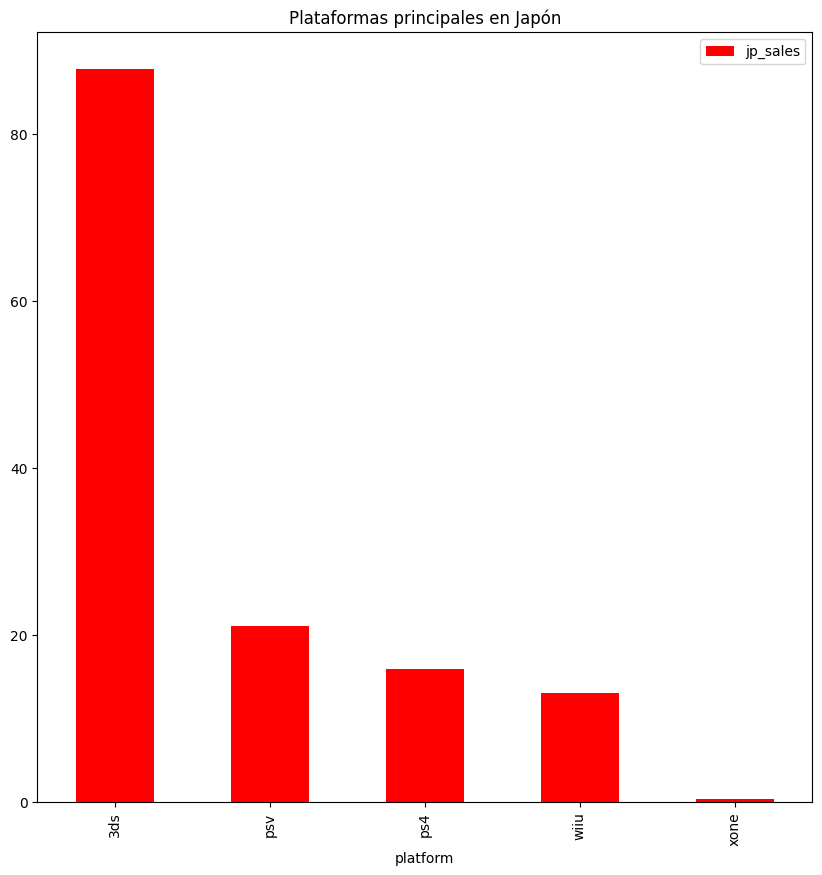


          jp_sales
platform          
3ds          87.79
psv          21.11
ps4          15.96
wiiu         13.01
xone          0.34
-----------------------------



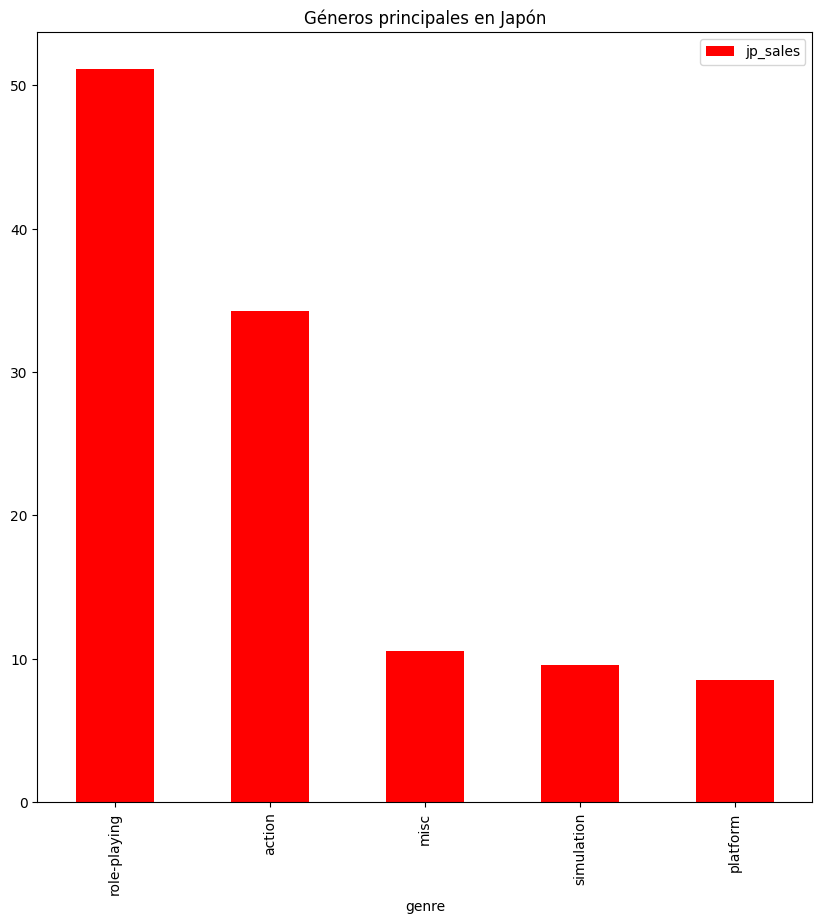


              jp_sales
genre                 
role-playing     51.13
action           34.26
misc             10.53
simulation        9.61
platform          8.55
-----------------------------



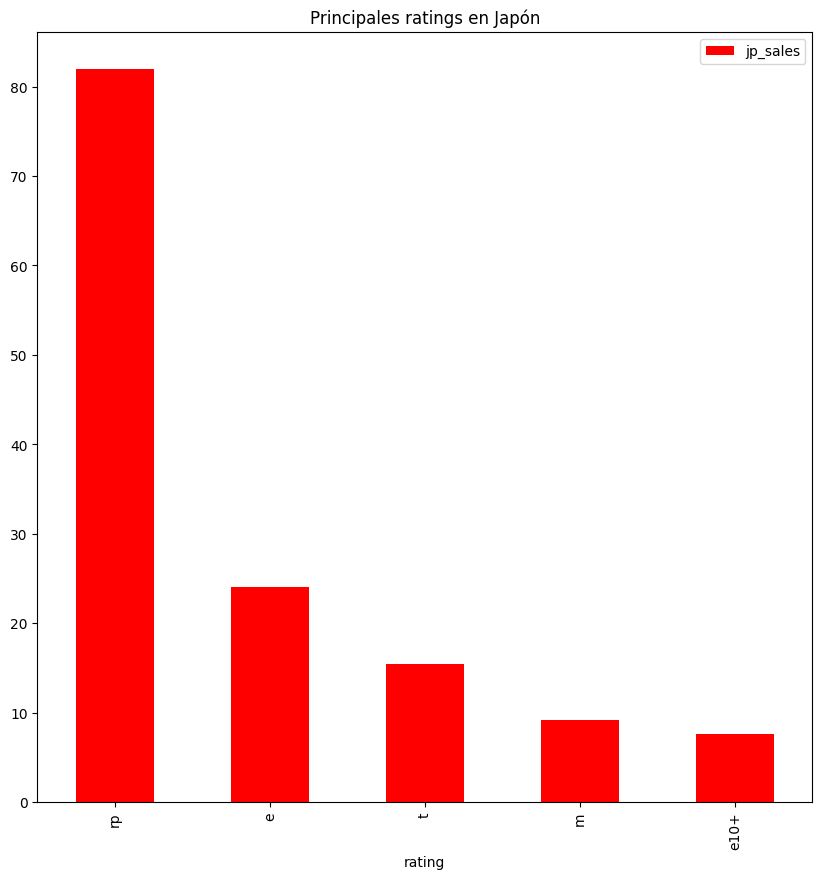


        jp_sales
rating          
rp         82.00
e          23.99
t          15.44
m           9.15
e10+        7.63
-----------------------------


In [72]:
region_profile(games_potentially_profitable, 'jp_sales', 'Japón', 'red')

Para la región de Japón tenemos los siguientes patrones por cada gráfico:
* Las cinco plataformas líderes siguen el siguiente orden de importancia: 3DS, PSV, PS4, Wii U y Xbox One. 3DS acapara la mayor parte de las ventas de manera significativa. El segundo lugar está bastante alejado del primero, aunque sorprende que sea el PSV.
* Los cinco géneros líderes están de acuerdo al siguiente orden de relevancia: "role-playing", "action", "misc", "simulation" y "platform". Los dos primeros acaparan la mayor parte de las ventas, y el resto muestra una distribución algo más uniforme.
* Los ratings más relevantes de los videojuegos siguen el siguiente orden en importancia: RP, E, T, M y E10+. Sorprende que la mayor parte de los videojuegos jugados en Japón no tengan una clasificación ERSB. Exluyendo a esta categoría, E y T son los secundarios más importantes.

En conclusión, para este mercado el comportamiento se aleja bastante de las tendencias generales encontradas con los datos globales, por características y preferencias que resultan bastante distintas al resto del mercado. Plataformas como 3DS, quizá PSV o PS4; géneros como "role-playing" y "action"; y ratings como "RP", "E" o "T" son características de posibles juegos exitosos y posibles centros de foco al momento de realizar promociones segmentadas por mercado.

Para tener idea de qué tipos de juegos podrían servir como ejemplo, mostraremos un ejemplo con las condiciones para este mercado:

In [73]:
games_potentially_profitable.query("platform == '3ds' and genre == 'role-playing' and rating == 'rp'").head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_esrb,total_sales
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,rp,rating pending,14.60
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,rp,rating pending,11.68
108,pokemon sun/moon,3ds,2016,role-playing,2.98,1.45,2.26,0.45,NaN,NaN,rp,rating pending,7.14
385,monster hunter 4,3ds,2013,role-playing,0.00,0.00,3.44,0.00,NaN,NaN,rp,rating pending,3.44
412,yokai watch 2 ganso/honke,3ds,2014,role-playing,0.09,0.00,3.18,0.01,NaN,NaN,rp,rating pending,3.28


## Conclusiones del apartado <a id='f9'></a>

De manera general, podemos concluir que el éxito de un juego tiene características comunes como las siguientes a nivel global:

* Probablemente muestran una buena recepción ante la crítica especializada.
* Probablemente sean lanzados para plataformas como PS4, Xbox One o cualquiera reciente de Nintendo.
* Probablemente sean juegos de acción, *shooter* o *role-playing*.

Estos factores son bastante representativos y aproximados para las regiones de Norteamérica y Europa. Sin embargo, para Japón las preferencias cambian. Plataformas como 3DS, y en menor medida PSV y PS4; géneros como "role-playing" y "action"; y ratings como "RP", "E" o "T" son características de posibles juegos exitosos para la región de Japón.

# Pruebas de hipótesis <a id='g'></a>

Ya que queremos probar estas hipótesis para establecer de forma más formal el comportamiento de los usuarios con miras a proyectar su comportamiento en el año 2017, usaremos la misma tabla filtrada ``games_potentially_profitable``, a la cual añadiremos algunos filtros extra para probar las hipótesis en específico.

## Primera hipótesis: diferencia entre las calificaciones promedio de los usuarios de Xbox One y PC <a id='g1'></a>

Para esta prueba de hipótesis, guardaremos los datos en datasets para cada plataforma:

In [74]:
xone_hyp = games_potentially_profitable.query("platform == 'xone'")
xone_hyp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    int32  
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     169 non-null    float64
 9   user_score       182 non-null    float64
 10  rating           247 non-null    object 
 11  rating_esrb      247 non-null    object 
 12  total_sales      247 non-null    float64
dtypes: float64(7), int32(1), object(5)
memory usage: 26.1+ KB


In [75]:
pc_hyp = games_potentially_profitable.query("platform == 'pc'")
pc_hyp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 192 to 16690
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             250 non-null    object 
 1   platform         250 non-null    object 
 2   year_of_release  250 non-null    int32  
 3   genre            250 non-null    object 
 4   na_sales         250 non-null    float64
 5   eu_sales         250 non-null    float64
 6   jp_sales         250 non-null    float64
 7   other_sales      250 non-null    float64
 8   critic_score     198 non-null    float64
 9   user_score       206 non-null    float64
 10  rating           250 non-null    object 
 11  rating_esrb      250 non-null    object 
 12  total_sales      250 non-null    float64
dtypes: float64(7), int32(1), object(5)
memory usage: 26.4+ KB


También obtendremos los principales estadísticos de las columnas a estudiar:

In [76]:
xone_hyp['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [77]:
pc_hyp['user_score'].describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Para decidirnos por una prueba paramétrica o no paramétrica, realizaremos una prueba de normalidad de nuestras variables utilizando el test de normalidad de Shapiro-Wilk de la librería de SciPy. 

Este test tiene las siguientes hipótesis:

Hipótesis nula: $H_0:$ la muestra sigue una distribución normal.

Hipótesis alternativa: $H_1:$ la muestra no sigue una distribución normal (no se comprueba $H_0$).

Nivel de significancia $\alpha = 0.05$

Criterio de decisión: Si  p-value $< \alpha$, se rechaza $H_0$. De lo contrario, no se rechaza $H_0$.

In [78]:
st.shapiro(xone_hyp['user_score'].dropna())

ShapiroResult(statistic=0.9550554752349854, pvalue=1.5249203897838015e-05)

Dado que el pvalue del test es mucho menor al nivel de significancia, rechazamos la hipótesis nula de que nuestra muestra sigue una distribución normal. Es decir, la distribución de ``user_score`` de los usuarios del Xbox One muy probablemente no se aproxima a una distribución normal. 

In [79]:
st.shapiro(pc_hyp['user_score'].dropna())

ShapiroResult(statistic=0.9382853507995605, pvalue=1.141009775551538e-07)

De igual forma, para ambos casos aunque se tome un nivel de significancia de 0.01, el pvalue del test es mucho menor a este (alpha), lo cual nos lleva a rechazar la hipótesis nula. 

Con estos resultados, lo recomendable sería utilizar una prueba no paramétrica, como el test de Mann-Whitney U de la librería SciPy. Para este contexto, esta prueba tiene las siguientes hipótesis:

Hipótesis nula: $H_0:$ Ambos grupos tienen medianas iguales

Hipótesis alternativa: $H_1:$ Ambos grupos no tienen medianas iguales (no se comprueba $H_0$)

Nivel de significancia $\alpha = 0.05$

Criterio de decisión: Si  $p-value_t < \alpha$, se rechaza $H_0$. De lo contrario, no se rechaza $H_0$.

In [80]:
alpha = 0.05

statistic_1, p_value_1 = st.mannwhitneyu(xone_hyp['user_score'].dropna(), pc_hyp['user_score'].dropna() ) #test de Mann-Whitney

print(f"p-value: {p_value_1}") 

if p_value_1 < alpha: # si el pvalue es menor que el resultado
    print("Rechazamos la hipótesis nula") # rechaza H0
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.8649062974699414
No rechazamos la hipótesis nula


Con la información que tenemos, no podemos rechazar la hipótesis nula de que las medianas de ambos grupos son iguales. En otras palabras, tenemos bastante certeza estadística de que son iguales, incluso tomando un $\alpha = 0.01$. Podríamos concluir que la puntuación de los usuarios no es estadísticamente diferente en plataformas Xbox One y PC. De hecho, en sus estadísticos se evidenciaba esta igualdad entre medianas.

## Segunda hipótesis: diferencia entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes <a id='g2'></a>

Para nuestra segunda hipótesis, también generaremos dos datasets con la información requerida para probar esta hipótesis:

In [81]:
action_hyp = games_potentially_profitable.query("genre == 'action'")
action_hyp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 42 to 16697
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             660 non-null    object 
 1   platform         660 non-null    object 
 2   year_of_release  660 non-null    int32  
 3   genre            660 non-null    object 
 4   na_sales         660 non-null    float64
 5   eu_sales         660 non-null    float64
 6   jp_sales         660 non-null    float64
 7   other_sales      660 non-null    float64
 8   critic_score     302 non-null    float64
 9   user_score       337 non-null    float64
 10  rating           660 non-null    object 
 11  rating_esrb      660 non-null    object 
 12  total_sales      660 non-null    float64
dtypes: float64(7), int32(1), object(5)
memory usage: 69.6+ KB


In [82]:
sports_hyp = games_potentially_profitable.query("genre == 'sports'")
sports_hyp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 77 to 16641
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             142 non-null    object 
 1   platform         142 non-null    object 
 2   year_of_release  142 non-null    int32  
 3   genre            142 non-null    object 
 4   na_sales         142 non-null    float64
 5   eu_sales         142 non-null    float64
 6   jp_sales         142 non-null    float64
 7   other_sales      142 non-null    float64
 8   critic_score     100 non-null    float64
 9   user_score       112 non-null    float64
 10  rating           142 non-null    object 
 11  rating_esrb      142 non-null    object 
 12  total_sales      142 non-null    float64
dtypes: float64(7), int32(1), object(5)
memory usage: 15.0+ KB


Obtendremos los estadísticos de las columnas a estudiar:

In [83]:
action_hyp['user_score'].describe()

count    337.000000
mean       6.887537
std        1.340162
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.000000
Name: user_score, dtype: float64

In [84]:
sports_hyp['user_score'].describe()

count    112.000000
mean       5.658929
std        1.629821
min        1.400000
25%        4.750000
50%        5.900000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

Al igual que en la hipótesis anterior, necesitamos demostrar si siguen una distribución normal para decidir entre una prueba paramétrica o no paremétrica. Nuevamente usaremos el test de Shapiro para esta labor. Nuevamente traeremos a sus hipótesis:

Hipótesis nula: $H_0:$ la muestra sigue una distribución normal.

Hipótesis alternativa: $H_1:$ la muestra no sigue una distribución normal (no se comprueba $H_0$).

Nivel de significancia $\alpha = 0.05$

Criterio de decisión: Si  p-value $< \alpha$, se rechaza $H_0$. De lo contrario, no se rechaza $H_0$.

In [85]:
st.shapiro(action_hyp['user_score'].dropna())

ShapiroResult(statistic=0.9032865166664124, pvalue=7.602903360050609e-14)

Nuevamente rechazamos la hipótesis nula de normalidad de nuestra variable cuando el género es "action".

In [86]:
st.shapiro(sports_hyp['user_score'].dropna())

ShapiroResult(statistic=0.9613258242607117, pvalue=0.0025282385759055614)

El p-value determinado es menor que el nivel de significancia, lo que nos lleva a rechazar la hipótesis nula de normalidad de nuestra variable. Por tanto, nuevamente usaremos el test no paramétrico de Mann-Whitney U para calcular la diferencia entre las puntuaciones de los usuarios de cada dataset. También traemos de nuevo las hipótesis correspondientes a este test:

Hipótesis nula: $H_0:$ Ambos grupos tienen medianas iguales

Hipótesis alternativa: $H_1:$ Ambos grupos no tienen medianas iguales (no se comprueba $H_0$)

Nivel de significancia $\alpha = 0.05$

Criterio de decisión: Si  $p-value_t < \alpha$, se rechaza $H_0$. De lo contrario, no se rechaza $H_0$.

In [87]:
statistic_2, p_value_2 = st.mannwhitneyu(action_hyp['user_score'].dropna(), sports_hyp['user_score'].dropna() ) #test de Mann-Whitney

print(f"p-value: {p_value_2}") 

if p_value_2 < alpha: # si el pvalue es menor que el resultado
    print("Rechazamos la hipótesis nula") # rechaza H0
else:
    print("No rechazamos la hipótesis nula")

p-value: 3.351190004799919e-14
Rechazamos la hipótesis nula


El p-value resultado de la prueba nos indica que debemos rechazar la hipótesis nula porque tenemos certeza estadística para aquello. Dicho de otra forma, no podemos afirmar que estos grupos tengan iguales medianas, o que tenemos mucha certeza de que sus medianas son diferentes. Cualquiera que fuese la interpretación, esta es acorde a las medianas respectivas, donde presumiblemente los usuarios del género "action" dan puntuaciones medianas más altas que los de "sports". En conclusión, muy probablemente los juegos de acción sean preferidos y mejor valorados por los usuarios respecto a los de deportes.

# Conclusiones del proyecto <a id='h'></a>

**Conclusiones del preprocesamiento de datos**

* Los errores de nombres en mayúsculas fueron corregidos para los nombres de columnas y sus valores.
* Se eliminaron algunos valores ausentes por su poca relevancia.
* Tratamos los valores ausentes de ``year_of_release`` y ``rating``.
* En algunas columnas encontramos valores extraños, que finalmente fueron transformafos junto a las columnas en sí.
* Se enriquecieron los datos, generando datos para los ingresos totales.

**Conclusiones del análisis de datos**

Después de haber analizado y transformado nuestros datos, pudimos extraer ciertas características de los videojuegos exitosos:

* Probablemente muestran buenos puntajes de la crítica especializada.
* Probablemente esté disponible y sea lanzado para plataformas como PS4, Xbox One o cualquiera que sea reciente de Nintendo.
* Probablemente su género sea el de acción, shooter o role-playing.

Todos estos factores son aproximadamente similares incluso para usuarios de regiones como Norteamérica o Europa. Sin embargo, un usuario promedio de Japón tiene preferencias distintas, como plataforma 3DS, género "role-playing" y ratings como RP.

**Conclusiones de las pruebas de hipótesis**

* En ambas hipótesis, nuestras muestras no se adaptaban a una distribución normal. lo que nos llevó a utilizar una prueba no paramétrica: el test de Mann-Whitney U.
* No pudimos demostrar que la puntuación de los usuarios de Xbox sea diferente al de PC. Al contrario, tenemos bastante certeza de que son iguales.
* Pudimos demostrar que la puntuación de los usuarios del género acción es diferente al de los usuarios del género deportes. En concreto, la evidencia sugiere que la puntuación de usuarios de acción es mayor al de usuarios de deportes. Las causas de este fenómeno se desconocen.